#### This code is used to obtain descriptors directly from spe calculations and convert into a .csv table

Import from .out file in spe

obtain
electronic
- NBO Charges of donor atom, metal atom
- NBO charge of atoms of different atomic distances
- lone pair occupancy of donor atoms

geometric
- bite angle
- bond distance
- difference in distance
- geometric index
- atom distance between each donor atom

polarizability

HOMO-LUMO (electronic)

percent buried volume
-mordred calculations


In [50]:
import os
from pathlib import Path
import re #Import RegEx
import os
import math
import numpy as np
import pandas as pd
from pathlib import Path
import ast

In [51]:
directory = os.getcwd()
directory

'C:\\Users\\George\\Desktop\\Research_UCLA\\CIC\\Computational Work\\Project cluster\\structures\\structures_ligand_id'

In [68]:
spe_directory = directory + '\\combined-spe-ligand-id'
complex_xyz_directory = directory + '\\complex_ligand_xyz'

In [54]:
# Aims
# Extract descriptor from output file of spe.
# Extract geometric descriptors (bond angles, bond lengths) and electronic descriptors (nbo charge, HOMO-LUMO gap)
# Input needed: No. for the donor atoms (A and B) as well as metal atom (Pd)

# Bond distance: given cartesian coordinates, find distance between atoms
# Bond angle: given three atoms, find angle




#Input excel table containing metal, atom_a and atom_b name
# Atoms_label.csv obtained through 'opt_out_to_spe_out_ligand_complex code'
atoms_label_df = pd.read_csv(r'atoms_label.csv')   
atoms_label_df.iloc[11]

Filename                                                      ligand-013-p-p-5
Pd_atom label                                                                3
Methyl_atom_1 label                                                          8
Methyl_atom_2 label                                                          4
Hydrogens_methyl_1_label                                           [11, 10, 9]
Hydrogens_methyl_2_label                                             [5, 7, 6]
Ligand_atom_1 label                                                          1
Ligand_atom_2 label                                                         12
Atoms_distance_2 label                                 [2, 38, 72, 17, 21, 55]
Atoms_distance_3 label       [13, 14, 15, 18, 19, 22, 23, 24, 39, 40, 41, 5...
Atoms_distance_4 label       [16, 20, 25, 26, 27, 28, 29, 30, 42, 43, 44, 4...
Atoms_distance_2_a label                                          [17, 55, 72]
Atoms_distance_3_a label                  [73, 74, 7

In [62]:
xyz_match = ['X           Y           Z']
LUMO_match = ['Alpha virt. eigenvalues']
HOMO_match = ['Alpha  occ. eigenvalues']
nbo_match = ['Natural Population Analysis']
mulliken_match = ['Mulliken charges:']

missing_nbo_spe_calc =[]
missing_mulliken_spe_calc = []
# Initiate list for gathering descriptor values
name_list = []
metal_atom_list = []
ligand_atom_a_list = []
ligand_atom_b_list = []
metal_ligand_distance_1_list = []
metal_ligand_distance_2_list = []
bite_angle_list = []
lumo_list = []
homo_list = []
homo_lumo_list = []
nbo_pd_list = []
nbo_a_list = []
nbo_b_list = []
nbo_a_b_list = []
nbo_a_b_avg_list = []
nbo_dist_2_avg_list = []
nbo_dist_3_avg_list = []
nbo_dist_4_avg_list = []
nbo_dist_2_min_list = []
nbo_dist_3_min_list = []
nbo_dist_4_min_list = []
nbo_dist_2_max_list = []
nbo_dist_3_max_list = []
nbo_dist_4_max_list = []
nbo_dist_2_a_avg_list = []
nbo_dist_3_a_avg_list = []
nbo_dist_4_a_avg_list = []
nbo_dist_2_b_avg_list = []
nbo_dist_3_b_avg_list = []
nbo_dist_4_b_avg_list = []
nbo_dist_2_a_b_avg_diff_list = []
nbo_dist_3_a_b_avg_diff_list = []
nbo_dist_4_a_b_avg_diff_list = []
nbo_dist_2_a_min_list = []
nbo_dist_3_a_min_list = []
nbo_dist_4_a_min_list = []
nbo_dist_2_a_max_list = []
nbo_dist_3_a_max_list = []
nbo_dist_4_a_max_list = []
nbo_dist_2_b_min_list = []
nbo_dist_3_b_min_list = []
nbo_dist_4_b_min_list = []
nbo_dist_2_b_max_list = []
nbo_dist_3_b_max_list = []
nbo_dist_4_b_max_list = []

nbo_metal_donor_diff_list = []
nbo_metal_a_diff_list = []
nbo_metal_b_diff_list = []
nbo_2_1_avg_diff_list = []
nbo_3_2_avg_diff_list = []
nbo_4_3_avg_diff_list = []
nbo_2_1_a_avg_diff_list = []
nbo_3_2_a_avg_diff_list = []
nbo_4_3_a_avg_diff_list = []
nbo_2_1_b_avg_diff_list = []
nbo_3_2_b_avg_diff_list = []
nbo_4_3_b_avg_diff_list = []
 

mulliken_pd_list = []
mulliken_a_list = []
mulliken_b_list = []
mulliken_a_b_list = []
mulliken_dist_2_avg_list = []
mulliken_dist_3_avg_list = []
mulliken_dist_4_avg_list = []

angle_deviation_percent_list = []

In [63]:
# Read in .out file
index_count = 0
for subdir,dirs,files in os.walk(spe_directory):                  # Loop over each directory, subdirectory and files
    for file in files:                                      # Loop over each file
        if any([file.endswith('-spe.out')]):                    # If file is a .out file
            filename = os.path.join(subdir, file)       # Return path to file
            name = Path(filename).stem           # Extract filename from the end of path and return as a string
            name = name.replace('-spe','')     #Remove -opt in string to get just the name of ligand 'pd-x-x-x'
            name_list.append(name)
            print(name)

            mylines = []

            with open (filename, 'rt') as myfile:       # Open .out for reading text
                # myfile = myfile.read()                # Read the entire file to a string
                for myline in myfile:                    # For each line, stored as myline,
                    mylines.append(myline)               # add its contents to mylines list.

                    
                for line in mylines:
                    if 'NAtoms' in line:
                        number_list = re.findall('-?\d*\.?\d+',line)            # get number of atoms
                        natoms = int(number_list[0])     



                # Identify row in atom_label_df that matches the name
                matching_row = atoms_label_df.loc[atoms_label_df['Filename'] == name]
                # print(matching_row)
    
                
            
                # Assign atom labels based on dataframe 
                # print(index_count)
                pd_atom = matching_row.loc[index_count]['Pd_atom label']
                ligand_atom_1 = matching_row.loc[index_count]['Ligand_atom_1 label']
                ligand_atom_2 = matching_row.loc[index_count]['Ligand_atom_2 label']
                atoms_distance_2 = ast.literal_eval(matching_row.loc[index_count]['Atoms_distance_2 label'])
                atoms_distance_3 = ast.literal_eval(matching_row.loc[index_count]['Atoms_distance_3 label'])
                atoms_distance_4 = ast.literal_eval(matching_row.loc[index_count]['Atoms_distance_4 label'])
                atoms_distance_2_a = ast.literal_eval(matching_row.loc[index_count]['Atoms_distance_2_a label'])
                atoms_distance_3_a = ast.literal_eval(matching_row.loc[index_count]['Atoms_distance_3_a label'])                
                atoms_distance_4_a = ast.literal_eval(matching_row.loc[index_count]['Atoms_distance_4_a label'])                
                atoms_distance_2_b = ast.literal_eval(matching_row.loc[index_count]['Atoms_distance_2_b label'])
                atoms_distance_3_b = ast.literal_eval(matching_row.loc[index_count]['Atoms_distance_3_b label'])                
                atoms_distance_4_b = ast.literal_eval(matching_row.loc[index_count]['Atoms_distance_4_b label'])                 
                atom_label_shortest_path = ast.literal_eval(matching_row.loc[index_count]['Atom label shortest paths'])    
                
                index_count = index_count + 1
    #             metal = atoms_label_df.to_numeric(df.loc[row_index, column_name])   #Extract important atom labels for descriptor generation

                for line in mylines:
                    for phrase in xyz_match:                                # iterate through each phrases
                        if phrase in line:                                          # check if phrase is in line

                                                                                    # For loop for generating the XYZ coordinates
                            count = 0
                            xyz = []
                            line_number = mylines.index(line) + 2
                            while count < natoms:
                                count = count + 1
                                xyz.append(mylines[line_number])
                                line_number = line_number + 1


                x_coord = []
                y_coord = []
                z_coord = []
                atom_symbol =[]
                element = {"1":'H', "6":"C", "7": "N", "8":"O", "9":"F", "14": "Si", "15":"P", "16":"S", "17":"Cl", "26":"Fe", "35":"Br", "46":"Pd"}

                # Generate XYZ file in .txt form, then find xyz coordinates for metal, atom_a and atom_b
                for line in xyz:
                    number_list = re.findall('-?\d*\.?\d+',line)
                    atom_number = int(number_list[0])
                    element_number = int(number_list[1])
                    atom_x = float(number_list[3])
                    atom_y = float(number_list[4])
                    atom_z = float(number_list[5])

                    # Make xyz coord into .txt file for percent buried volume
                    x_coord.append(atom_x)
                    y_coord.append(atom_y)
                    z_coord.append(atom_z)
                    atom_symbol.append(element[str(element_number)])
                    name_xyz = name + '_xyz.txt'            

    #                     xyz_df.to_csv(name_xyz, header=False, index=False, sep = " ")

                    # Identify metal, atom_a and atom_b numbers and obtain their respective x,y,z coords
                    if atom_number == pd_atom:
                        metal_x = atom_x
                        metal_y = atom_y
                        metal_z = atom_z
                        if element_number != 46:
                            print('Wrong metal atom number assignment ',filename) # Checking if metal atom was assigned correctly
                    elif atom_number == ligand_atom_1:
                        a_x = atom_x
                        a_y = atom_y
                        a_z = atom_z
                    elif atom_number == ligand_atom_2:
                        b_x = atom_x
                        b_y = atom_y
                        b_z = atom_z

                data = {
                    'Atom': atom_symbol,
                    'X': x_coord,
                    'Y': y_coord,
                    'Z': z_coord
                }

                xyz_df = pd.DataFrame(data)      


                mylines = []

                with open (filename, 'rt') as myfile:       # Open .out for reading text
                    # myfile = myfile.read()                # Read the entire file to a string
                    for myline in myfile:                    # For each line, stored as myline,
                        mylines.append(myline)               # add its contents to mylines list.

                # print(type(matching_row))

                # Find HOMO - LUMO energy gap in SPE file

                LUMO = []
                for phrase in LUMO_match:
                    for line in mylines:
                        if phrase in line:
                            LUMO.append(line)
                number_list = re.findall('-?\d*\.?\d+',LUMO[0])            # get value from line containing LUMO
                LUMO_energy = float(number_list[0])                         # get first value from the line, which represents the LUMO

                HOMO = []
                for phrase in HOMO_match:
                    for line in mylines:
                        if phrase in line:
                            HOMO.append(line)
                number_list = re.findall('-?\d*\.?\d+',HOMO[-1])            # get value from line containing LUMO
                HOMO_energy = float(number_list[-1])                        # get lsat value from line, which represents HOMO

                HOMO_LUMO = round(LUMO_energy - HOMO_energy,4)    
                # print('LUMO: ', LUMO_energy)
                # print('HOMO: ', HOMO_energy)
                # print('HOMO_LUMO: ', HOMO_LUMO)


                # Find NBO charge 

                #Obtain indexes for calculating NBO charge of different atom distances

                for phrase in nbo_match:                                       # iterate through each phrases
                    nbo_match_count = 0
                    for line in mylines:
                        if phrase in line:                                          # check if phrase is in line
                            nbo_match_count = nbo_match_count + 1
                            count = 0
                            nbo_xyz = []
                            line_number = mylines.index(line) + 6
                            while count < natoms:
                                count = count + 1
                                nbo_xyz.append(mylines[line_number])
                                line_number = line_number + 1

                            with open('nbo.txt', 'w') as filehandle:                   # Save nbo_xyz  into a txt file
                                for listitem in nbo_xyz:
                                    filehandle.write(listitem)
                    
                    

                # Extract NBO charge for metal, atom A and atom B, atom at distance 2,3,4
                if nbo_match_count == 0:
                    print('No NBO Charge calculation for ', name)
                    missing_nbo_spe_calc.append(name)
         
                    metal_nbo = 'Missing'
                    a_nbo = 'Missing'
                    nbo_difference = 'Missing'
                    nbo_a_b_avg = 'Missing'
                    nbo_distance_2_avg = 'Missing'
                    nbo_distance_3_avg = 'Missing'
                    nbo_distance_4_avg = 'Missing'
                    nbo_dist_2_a_avg = 'Missing'                  
                    nbo_dist_3_a_avg = 'Missing'  
                    nbo_dist_4_a_avg ='Missing'                   
                    nbo_dist_2_b_avg = 'Missing'           
                    nbo_dist_3_b_avg = 'Missing'
                    nbo_dist_4_b_avg = 'Missing'
                    
                    nbo_dist_2_min = 'Missing'
                    nbo_dist_3_min = 'Missing'               
                    nbo_dist_4_min ='Missing'
                    nbo_dist_2_max = 'Missing'
                    nbo_dist_3_max = 'Missing'                 
                    nbo_dist_4_max = 'Missing' 
                    
                    nbo_dist_2_a_b_avg_diff = 'Missing'             
                    nbo_dist_3_a_b_avg_diff = 'Missing'           
                    nbo_dist_4_a_b_avg_diff = 'Missing'
                    
                    nbo_dist_2_a_min = 'Missing'
                    nbo_dist_3_a_min = 'Missing'              
                    nbo_dist_4_a_min = 'Missing'                   
                    nbo_dist_2_b_min = 'Missing'
                    nbo_dist_3_b_min = 'Missing'              
                    nbo_dist_4_b_min = 'Missing'   
                    nbo_dist_2_a_max = 'Missing'
                    nbo_dist_3_a_max = 'Missing'         
                    nbo_dist_4_a_max = 'Missing'         
                    nbo_dist_2_b_max = 'Missing'
                    nbo_dist_3_b_max = 'Missing'           
                    nbo_dist_4_b_max = 'Missing'  
                    
                    nbo_metal_donor_diff = 'Missing'  
                    nbo_metal_a_diff ='Missing'                               
                    nbo_metal_b_diff = 'Missing'  
                    nbo_2_1_avg_diff = 'Missing'  
                    nbo_3_2_avg_diff = 'Missing'  
                    nbo_4_3_avg_diff = 'Missing'  
                    nbo_2_1_a_avg_diff = 'Missing'  
                    nbo_3_2_a_avg_diff = 'Missing'  
                    nbo_4_3_a_avg_diff = 'Missing'  
                    nbo_2_1_b_avg_diff = 'Missing'  
                    nbo_3_2_b_avg_diff = 'Missing'  
                    nbo_4_3_b_avg_diff = 'Missing'  
                          
                    
                elif nbo_match_count > 0:

                    nbo_distance_2 = []
                    nbo_distance_3 = []
                    nbo_distance_4 = []
                    nbo_distance_2_a = []
                    nbo_distance_3_a = []
                    nbo_distance_4_a = []   
                    nbo_distance_2_b = []
                    nbo_distance_3_b = []
                    nbo_distance_4_b = []   
                    atom_number_check_3_a = []
                    atom_number_check_4_a = []
                    atom_number_check_3_b = []
                    atom_number_check_4_b = []                    
                    

                    for line in nbo_xyz:
                        number_list = re.findall('-?\d*\.?\d+',line)
                        atom_number = int(number_list[0])

                        if atom_number == pd_atom:
                            metal_nbo = float(number_list[1])
                            print('Pd_nbo: ', metal_nbo)

                        elif atom_number == ligand_atom_1:
                            a_nbo = float(number_list[1])
                            # print('Ligand atom A nbo: ', a_nbo)

                        elif atom_number == ligand_atom_2:
                            b_nbo = float(number_list[1]) 
                            # print('Ligand atom B nbo: ', b_nbo)

                        elif atom_number in atoms_distance_2:
                            nbo_distance_2.append(float(number_list[1]))

                        elif atom_number in atoms_distance_3:
                            nbo_distance_3.append(float(number_list[1]))                

                        elif atom_number in atoms_distance_4:
                            nbo_distance_4.append(float(number_list[1]))
                        
                        if atom_number in atoms_distance_2_a:
                            nbo_distance_2_a.append(float(number_list[1]))

                        elif atom_number in atoms_distance_3_a:
                            nbo_distance_3_a.append(float(number_list[1]))
                            atom_number_check_3_a.append(atom_number)
                            
                        elif atom_number in atoms_distance_4_a:
                            nbo_distance_4_a.append(float(number_list[1]))
                            atom_number_check_4_a.append(atom_number)
                            
                        if atom_number in atoms_distance_2_b:
                            nbo_distance_2_b.append(float(number_list[1]))

                        elif atom_number in atoms_distance_3_b:
                            nbo_distance_3_b.append(float(number_list[1]))
                            atom_number_check_3_b.append(atom_number)
                            
                        elif atom_number in atoms_distance_4_b:
                            nbo_distance_4_b.append(float(number_list[1]))
                            atom_number_check_4_b.append(atom_number)
                                                   
                    nbo_a_b_avg = round((a_nbo+b_nbo)/ 2, 4)
                    nbo_distance_2_avg = round(sum(nbo_distance_2) / len(nbo_distance_2), 4)
                    nbo_distance_3_avg = round(sum(nbo_distance_3) / len(nbo_distance_3),4)                      
                    nbo_a_b_avg = round((a_nbo+b_nbo)/ 2, 4)
                    nbo_distance_2_avg = round(sum(nbo_distance_2) / len(nbo_distance_2), 4)
                    nbo_distance_3_avg = round(sum(nbo_distance_3) / len(nbo_distance_3),4)                       
                    nbo_dist_2_a_avg = round(sum(nbo_distance_2_a) / len(nbo_distance_2_a),4)                    
                    nbo_dist_3_a_avg = round(sum(nbo_distance_3_a) / len(nbo_distance_3_a),4)                                         
                    nbo_dist_2_b_avg = round(sum(nbo_distance_2_b) / len(nbo_distance_2_b),4)                    
                    nbo_dist_3_b_avg = round(sum(nbo_distance_3_b) / len(nbo_distance_3_b),4)     
                    nbo_dist_2_min = min(nbo_distance_2)
                    nbo_dist_3_min = min(nbo_distance_3)                                            
                    nbo_dist_2_max = max(nbo_distance_2)
                    nbo_dist_3_max = max(nbo_distance_3)                    
                    nbo_dist_2_a_b_avg_diff = round(abs(nbo_dist_2_a_avg-nbo_dist_2_b_avg),4)                  
                    nbo_dist_3_a_b_avg_diff = round(abs(nbo_dist_3_a_avg-nbo_dist_3_b_avg),4)                        
                    nbo_dist_2_a_min = min(nbo_distance_2_a)
                    nbo_dist_3_a_min = min(nbo_distance_3_a)                                                        
                    nbo_dist_2_b_min = min(nbo_distance_2_b)
                    nbo_dist_3_b_min = min(nbo_distance_3_b)                                                
                    nbo_dist_2_a_max = max(nbo_distance_2_a)
                    nbo_dist_3_a_max = max(nbo_distance_3_a)                                                      
                    nbo_dist_2_b_max = max(nbo_distance_2_b)
                    nbo_dist_3_b_max = max(nbo_distance_3_b)                    
                                            


                    # print('Average NBO for atom at distance 2: ', nbo_distance_2_avg)
                    # print('Average NBO for atom at distance 3: ', nbo_distance_3_avg)

                    # print('Average NBO for atom at distance 2 from A:', nbo_dist_2_a_avg)
                    # print('Average NBO for atom at distance 3 from A:', nbo_dist_3_a_avg)                    

                    # print('Average NBO for atom at distance 2 from B:', nbo_dist_2_b_avg)
                    # print('Average NBO for atom at distance 3 from B:', nbo_dist_3_b_avg)                    
             
                    # print('Average NBO diff for atom at distance 2: ', nbo_dist_2_a_b_avg_diff)
                    # print('Average NBO diff for atom at distance 3: ', nbo_dist_3_a_b_avg_diff)
  


                    # print('Min NBO for atom at distance 2', nbo_dist_2_min)
                    # print('Min NBO for atom at distance 3', nbo_dist_3_min)                    
              
                    # print('Max NBO for atom at distance 2', nbo_dist_2_max)
                    # print('Max NBO for atom at distance 3', nbo_dist_3_max)                    
                                    
                    # print('Min NBO for atom at distance 2 from A:', nbo_dist_2_a_min)                    
                    # print('Min NBO for atom at distance 3 from A:', nbo_dist_3_a_min)                       
                
                    # print('Min NBO for atom at distance 2 from B:', nbo_dist_2_b_min)                    
                    # print('Min NBO for atom at distance 3 from B:', nbo_dist_3_b_min)                       
                                    
                    # print('Max NBO for atom at distance 2 from A:', nbo_dist_2_a_max)                    
                    # print('Max NBO for atom at distance 3 from A:', nbo_dist_3_a_max)                       
                  
                    # print('Max NBO for atom at distance 2 from B:', nbo_dist_2_b_max)                    
                    # print('Max NBO for atom at distance 3 from B:', nbo_dist_3_b_max)                       
                 

                    # print('Atom 3a check: ', atom_number_check_3_a)
                    # print('Atom 4a check: ', atom_number_check_4_a)                    
                    # print('Atom 3b check: ', atom_number_check_3_b)
                    # print('Atom 4b check: ', atom_number_check_4_b)     

                    nbo_difference = round(abs(a_nbo - b_nbo),4)
                    # print('NBO_diff: ', nbo_difference)

                    #Calculate difference in nbo between each distance
                    nbo_metal_donor_diff = abs(metal_nbo - nbo_a_b_avg)
                    nbo_metal_a_diff = abs(metal_nbo - a_nbo)
                    nbo_metal_b_diff = abs(metal_nbo - b_nbo)
                    nbo_2_1_avg_diff = abs(nbo_distance_2_avg - nbo_a_b_avg)
                    nbo_3_2_avg_diff = abs(nbo_distance_3_avg - nbo_distance_2_avg)       
                    nbo_2_1_a_avg_diff = abs(nbo_dist_2_a_avg - a_nbo)
                    nbo_3_2_a_avg_diff = abs(nbo_dist_3_a_avg - nbo_dist_2_a_avg)
                    nbo_2_1_b_avg_diff = abs(nbo_dist_2_b_avg - b_nbo)
                    nbo_3_2_b_avg_diff = abs(nbo_dist_3_b_avg - nbo_dist_2_b_avg)
       
                    # print('Average NBO metal donor atom diff:',nbo_metal_donor_diff)
                    # print('Difference Metal and Atom A', nbo_metal_a_diff)
                    # print('Difference Metal and Atom B', nbo_metal_b_diff)                    
                    # print('Average NBO distance 2 vs 1 diff:',nbo_2_1_avg_diff)                    
                    # print('Average NBO distance 3 vs 2 diff:',nbo_3_2_avg_diff)                        
                    # print('Average NBO distance 2 vs 1 from a diff:',nbo_2_1_a_avg_diff)                    
                    # print('Average NBO distance 3 vs 2 from a diff:',nbo_3_2_a_avg_diff)                                     
                    # print('Average NBO distance 2 vs 1 from b diff:',nbo_2_1_b_avg_diff)                    
                    # print('Average NBO distance 3 vs 2 from b diff:',nbo_3_2_b_avg_diff)                        

                    if len(nbo_distance_4) == 0:
                        print('Ligand has no more than 3 bond distances')
                        nbo_distance_4_avg = None
                        nbo_dist_4_a_avg = None
                        nbo_dist_4_b_avg = None        
                        nbo_dist_4_min = None
                        nbo_dist_4_max = None
                        nbo_dist_4_a_b_avg_diff = None
                        nbo_dist_4_a_min = None
                        nbo_dist_4_a_max = None
                        nbo_dist_4_b_min = None
                        nbo_dist_4_b_max = None
                        nbo_4_3_avg_diff = None
                        nbo_4_3_a_avg_diff = None
                        nbo_4_3_b_avg_diff = None

                    else:
                        nbo_distance_4_avg = round(sum(nbo_distance_4) / len(nbo_distance_4),4)
                        nbo_dist_4_a_avg = round(sum(nbo_distance_4_a) / len(nbo_distance_4_a),4)    
                        nbo_dist_4_b_avg = round(sum(nbo_distance_4_b) / len(nbo_distance_4_b),4)   
                        nbo_dist_4_min = min(nbo_distance_4)  
                        nbo_dist_4_max = max(nbo_distance_4)   
                        nbo_dist_4_a_b_avg_diff = round(abs(nbo_dist_4_a_avg-nbo_dist_4_b_avg),4)       
                        nbo_dist_4_a_min = min(nbo_distance_4_a)        
                        nbo_dist_4_b_min = min(nbo_distance_4_b)      
                        nbo_dist_4_a_max = max(nbo_distance_4_a)        
                        nbo_dist_4_b_max = max(nbo_distance_4_b)    
                        nbo_4_3_avg_diff = abs(nbo_distance_4_avg - nbo_distance_3_avg)                    
                        nbo_4_3_a_avg_diff = abs(nbo_dist_4_a_avg - nbo_dist_3_a_avg)  
                        nbo_4_3_b_avg_diff = abs(nbo_dist_4_b_avg - nbo_dist_3_b_avg)       


                        # print('Average NBO for atom at distance 4: ', nbo_distance_4_avg)
                        # print('Average NBO for atom at distance 4 from A:', nbo_dist_4_a_avg)
                        # print('Average NBO for atom at distance 4 from B:', nbo_dist_4_b_avg)   
                        # print('Min NBO for atom at distance 4', nbo_dist_4_min)                  
                        # print('Max NBO for atom at distance 4', nbo_dist_4_max)                          
                        # print('Average NBO diff for atom at distance 4: ', nbo_dist_4_a_b_avg_diff)  
                        # print('Min NBO for atom at distance 4 from A:', nbo_dist_4_a_min)   
                        # print('Min NBO for atom at distance 4 from B:', nbo_dist_4_b_min) 
                        # print('Max NBO for atom at distance 4 from A:', nbo_dist_4_a_max) 
                        # print('Max NBO for atom at distance 4 from B:', nbo_dist_4_b_max)                        
                        # print('Average NBO distance 4 vs 3 diff:',nbo_4_3_avg_diff)    
                        # print('Average NBO distance 4 vs 3 from a diff:',nbo_4_3_a_avg_diff)
                        # print('Average NBO distance 4 vs 3 from b diff:',nbo_4_3_b_avg_diff) 


                
                #Find Mulliken charge
                for phrase in mulliken_match:                                       # iterate through each phrases
                    mulliken_match_count = 0
                    for line in mylines:
                        if phrase in line:                                          # check if phrase is in line
                            mulliken_match_count = mulliken_match_count + 1

                            count = 0
                            mulliken_xyz = []
                            line_number = mylines.index(line) + 2
                            while count < natoms:
                                count = count + 1
                                mulliken_xyz.append(mylines[line_number])
                                line_number = line_number + 1

                            with open('mulliken.txt', 'w') as filehandle:                   # Save nbo_xyz  into a txt file
                                for listitem in mulliken_xyz:
                                    filehandle.write(listitem)            

                    
                if mulliken_match_count == 0:
                    print('No Mulliken Charge calculation for ', name)
                    missing_mulliken_spe_calc.append(name)

                    metal_mulliken = None
                    a_mulliken = None
                    b_mulliken = None
                    mulliken_difference = None
                    mulliken_distance_2_avg = None
                    mulliken_distance_3_avg = None
                    mulliken_distance_4_avg = None


                elif mulliken_match_count > 0:




                    # Extract mulliken charge for metal, atom A and atom B
                    mulliken_distance_2 = []
                    mulliken_distance_3 = []
                    mulliken_distance_4 = []
                    for line in mulliken_xyz:
                        number_list = re.findall('-?\d*\.?\d+',line)
                        atom_number = int(number_list[0])

                        if atom_number == pd_atom:
                            metal_mulliken = float(number_list[1])
                            # print('Pd_mulliken: ', metal_mulliken)

                        elif atom_number == ligand_atom_1:
                            a_mulliken = float(number_list[1])
                            # print('Ligand atom A mulliken: ', a_mulliken)

                        elif atom_number == ligand_atom_2:
                            b_mulliken = float(number_list[1]) 
                            # print('Ligand atom B mulliken: ', b_mulliken)

                        elif atom_number in atoms_distance_2:
                            mulliken_distance_2.append(float(number_list[1]))

                        elif atom_number in atoms_distance_3:
                            mulliken_distance_3.append(float(number_list[1]))                

                        elif atom_number in atoms_distance_4:
                            mulliken_distance_4.append(float(number_list[1]))

                    if len(mulliken_distance_2) > 0:
                        mulliken_distance_2_avg = round(sum(mulliken_distance_2) / len(mulliken_distance_2),4)
                    else: mulliken_distance_2_avg = None
                    
                    if len(mulliken_distance_3) > 0:
                        mulliken_distance_3_avg = round(sum(mulliken_distance_3) / len(mulliken_distance_3),4)
                    else: mulliken_distance_3_avg = None

                    if len(mulliken_distance_4) > 0:
                        mulliken_distance_4_avg = round(sum(mulliken_distance_4) / len(mulliken_distance_4),4)
                    else: mulliken_distance_4_avg = None
                        
                    # print('Mulliken for atom at distance 2: ', mulliken_distance_2_avg)
                    # print('Mulliken for atom at distance 3: ', mulliken_distance_3_avg)
                    # print('Mulliken for atom at distance 4: ', mulliken_distance_4_avg)                        


                    mulliken_difference = abs(a_mulliken - b_mulliken)
                    # print('Mulliken_diff: ', mulliken_difference)            

    #           Extract metal - donor atom distance

                metal_atoma_distance = round(math.sqrt((metal_x - a_x) ** 2 + (metal_y - a_y) ** 2 + (metal_z - a_z) ** 2),3)    
                metal_atomb_distance = round(math.sqrt((metal_x - b_x) ** 2 + (metal_y - b_y) ** 2 + (metal_z - b_z) ** 2),3)

                # print('Metal-L Distance_1: ',metal_atoma_distance)
                # print('Metal-L Distance_2: ',metal_atomb_distance)

                metal_atoma_vector = [a_x - metal_x, a_y - metal_y, a_z - metal_z]
                metal_atomb_vector = [b_x - metal_x, b_y - metal_y, b_z - metal_z]

                dot_pdt = np.dot(metal_atoma_vector,metal_atomb_vector)

                #Extract A-M-B angle by using arcos rule
                angle = int(math.degrees(math.acos (dot_pdt / ( metal_atoma_distance * metal_atomb_distance ))))     
                # print('Bite angle: ',angle)      

                
                #Extract total internal angle/len(atoms)
                # calculating sum of interior angle for a polygon with n edges = (n-2)x180 degrees
                
                number_of_sides = len(atom_label_shortest_path)
                sum_of_interior_angle_polygon = (number_of_sides - 2)*180
                
#                 my_list = [1, 2, 3, 4, 5]

                # Number of elements to consider in each iteration
                chunk_size = 3

                # Iterate through the list
                angle_list = []
                for i in range(len(atom_label_shortest_path)):
                    chunk = atom_label_shortest_path[i:i + chunk_size]  
                    if len(chunk) < chunk_size:
                        chunk += atom_label_shortest_path[:chunk_size - len(chunk)]  # Wrap around to the beginning
                    
                    # print(chunk) #chunk is three atom label for each iteration
                    
                    
                    
                    
                    #obtain xyz coordinates for each atom involved based on their label
                    #identify angle with arcos rule
                    #Add angle into a list of angles
                    
                    # print(xyz_df)
                    atom_1_row = xyz_df.loc[chunk[0]-1]
                    atom_2_row = xyz_df.loc[chunk[1]-1]
                    atom_3_row = xyz_df.loc[chunk[2]-1]
#                     print('Atom_1_row: ', atom_1_row)
#                     print('Atom_2_row: ', atom_2_row)
#                     print('Atom_3_row: ', atom_3_row)

                    atom_1_x = atom_1_row['X']
                    atom_1_y = atom_1_row['Y']
                    atom_1_z = atom_1_row['Z']
#                     print('Atom_1_x: ',atom_1_x)
#                     print('Atom_1_y: ',atom_1_y)                
#                     print('Atom_1_z: ',atom_1_z)                

                    atom_2_x = atom_2_row['X']
                    atom_2_y = atom_2_row['Y']
                    atom_2_z = atom_2_row['Z']
#                     print('Atom_2_x: ',atom_2_x)
#                     print('Atom_2_y: ',atom_2_y)                
#                     print('Atom_2_z: ',atom_2_z)   
                    
                    atom_3_x = atom_3_row['X']
                    atom_3_y = atom_3_row['Y']
                    atom_3_z = atom_3_row['Z']
#                     print('Atom_3_x: ',atom_3_x)
#                     print('Atom_3_y: ',atom_3_y)                
#                     print('Atom_3_z: ',atom_3_z)   
                           
                    atom_1_2_distance = round(math.sqrt((atom_1_x - atom_2_x) ** 2 + (atom_1_y - atom_2_y) ** 2 + (atom_1_z - atom_2_z) ** 2),5)  
                    atom_2_3_distance = round(math.sqrt((atom_3_x - atom_2_x) ** 2 + (atom_3_y - atom_2_y) ** 2 + (atom_3_z - atom_2_z) ** 2),5)                    
                   
#                     print('Atom 1-2 Distance: ',atom_1_2_distance)
#                     print('Atom 3-2 Distance: ',atom_2_3_distance)

                    atom_1_2_vector = [atom_1_x - atom_2_x, atom_1_y - atom_2_y, atom_1_z - atom_2_z]
                    atom_2_3_vector = [atom_3_x - atom_2_x, atom_3_y - atom_2_y, atom_3_z - atom_2_z]

                    dot_pdt = np.dot(atom_1_2_vector,atom_2_3_vector)  
                    
                    
                    #Extract A-M-B angle by using arcos rule
                    angle = round(float(math.degrees(math.acos (dot_pdt / ( atom_1_2_distance * atom_2_3_distance)))),5) 
                    angle_list.append(angle)
                    # print('Angle: ',angle)                 
                    # print(f"Iteration {i + 1}: {chunk}")                
                
                total_internal_angle = sum(angle_list)
                # print('Total internal angle: ',total_internal_angle)
                angle_deviation_percent = round(100*abs(total_internal_angle - sum_of_interior_angle_polygon)/sum_of_interior_angle_polygon,4)
                # print('Angle deviation: ',angle_deviation_percent)    


                #Add variables to lists
                
                ligand_atom_a_list.append(ligand_atom_1)
                ligand_atom_b_list.append(ligand_atom_2)
                metal_atom_list.append(pd_atom)
                metal_ligand_distance_1_list.append(metal_atoma_distance)
                metal_ligand_distance_2_list.append(metal_atomb_distance)
                bite_angle_list.append(angle)
                lumo_list.append(LUMO_energy)
                homo_list.append(HOMO_energy)
                homo_lumo_list.append(HOMO_LUMO)
                nbo_pd_list.append(metal_nbo)
                nbo_a_list.append(a_nbo)
                nbo_b_list.append(b_nbo)
                nbo_a_b_list.append(nbo_difference)
                nbo_a_b_avg_list.append(nbo_a_b_avg)
                nbo_dist_2_avg_list.append(nbo_distance_2_avg)
                nbo_dist_3_avg_list.append(nbo_distance_3_avg)
                nbo_dist_4_avg_list.append(nbo_distance_4_avg)
                nbo_dist_2_a_avg_list.append(nbo_dist_2_a_avg)
                nbo_dist_3_a_avg_list.append(nbo_dist_3_a_avg)
                nbo_dist_4_a_avg_list.append(nbo_dist_4_a_avg)
                nbo_dist_2_b_avg_list.append(nbo_dist_2_b_avg)
                nbo_dist_3_b_avg_list.append(nbo_dist_3_b_avg)
                nbo_dist_4_b_avg_list.append(nbo_dist_4_b_avg)
                nbo_dist_2_a_b_avg_diff_list.append(nbo_dist_2_a_b_avg_diff)
                nbo_dist_3_a_b_avg_diff_list.append(nbo_dist_3_a_b_avg_diff)
                nbo_dist_4_a_b_avg_diff_list.append(nbo_dist_4_a_b_avg_diff)            
                nbo_dist_2_a_min_list.append(nbo_dist_2_a_min)
                nbo_dist_3_a_min_list.append(nbo_dist_3_a_min)
                nbo_dist_4_a_min_list.append(nbo_dist_4_a_min)
                nbo_dist_2_b_min_list.append(nbo_dist_2_b_min)
                nbo_dist_3_b_min_list.append(nbo_dist_3_b_min)
                nbo_dist_4_b_min_list.append(nbo_dist_4_b_min)
                nbo_dist_2_a_max_list.append(nbo_dist_2_a_max)
                nbo_dist_3_a_max_list.append(nbo_dist_3_a_max)
                nbo_dist_4_a_max_list.append(nbo_dist_4_a_max)
                nbo_dist_2_b_max_list.append(nbo_dist_2_b_max)
                nbo_dist_3_b_max_list.append(nbo_dist_3_b_max)
                nbo_dist_4_b_max_list.append(nbo_dist_4_b_max)                
                nbo_dist_2_min_list.append(nbo_dist_2_min)
                nbo_dist_3_min_list.append(nbo_dist_3_min)                
                nbo_dist_4_min_list.append(nbo_dist_4_min)  
                nbo_dist_2_max_list.append(nbo_dist_2_max)
                nbo_dist_3_max_list.append(nbo_dist_3_max)                
                nbo_dist_4_max_list.append(nbo_dist_4_max)                  
                nbo_metal_donor_diff_list.append(nbo_metal_donor_diff)
                nbo_metal_a_diff_list.append(nbo_metal_a_diff)                
                nbo_metal_b_diff_list.append(nbo_metal_b_diff)
                nbo_2_1_avg_diff_list.append(nbo_2_1_avg_diff)
                nbo_3_2_avg_diff_list.append(nbo_3_2_avg_diff)
                nbo_4_3_avg_diff_list.append(nbo_4_3_avg_diff)
                nbo_2_1_a_avg_diff_list.append(nbo_2_1_a_avg_diff)
                nbo_3_2_a_avg_diff_list.append(nbo_3_2_a_avg_diff)
                nbo_4_3_a_avg_diff_list.append(nbo_4_3_a_avg_diff)
                nbo_2_1_b_avg_diff_list.append(nbo_2_1_b_avg_diff)
                nbo_3_2_b_avg_diff_list.append(nbo_3_2_b_avg_diff)
                nbo_4_3_b_avg_diff_list.append(nbo_4_3_b_avg_diff)                                 
                    
                
                
                mulliken_pd_list.append(metal_mulliken)
                mulliken_a_list.append(a_mulliken)
                mulliken_b_list.append(b_mulliken)
                mulliken_a_b_list.append(mulliken_difference)
                mulliken_dist_2_avg_list.append(mulliken_distance_2_avg)
                mulliken_dist_3_avg_list.append(mulliken_distance_3_avg)
                mulliken_dist_4_avg_list.append(mulliken_distance_4_avg)
                angle_deviation_percent_list.append(angle_deviation_percent)



# Define data dictionary for excel spreadsheet

data = {'Name': name_list,
       'Metal': metal_atom_list, 
       'Atom_A' : ligand_atom_a_list, 
       'Atom_B' : ligand_atom_b_list, 
       'A-M-B Angle' : bite_angle_list, 
       'M-A Distance' : metal_ligand_distance_1_list, 
       'M-B Distance' : metal_ligand_distance_2_list, 
        'Metal_NBO' : nbo_pd_list, 
        'A_NBO' : nbo_a_list, 
        'B_NBO' : nbo_b_list, 
        'HOMO_LUMO' : homo_lumo_list,
        'A-B_NBO' : nbo_a_b_list,
        'NBO-dist-2-avg': nbo_dist_2_avg_list,
        'NBO-dist-3-avg':nbo_dist_3_avg_list,
        'NBO-dist-4-avg':nbo_dist_4_avg_list,
        'NBO-dist-2-a-avg': nbo_dist_2_a_avg_list,
        'NBO-dist-3-a-avg': nbo_dist_3_a_avg_list,        
        'NBO-dist-4-a-avg': nbo_dist_4_a_avg_list,        
        'NBO-dist-2-b-avg': nbo_dist_2_b_avg_list,
        'NBO-dist-3-b-avg': nbo_dist_3_b_avg_list,        
        'NBO-dist-4-b-avg': nbo_dist_4_b_avg_list,    
        'NBO-dist-2-a-b-diff' : nbo_dist_2_a_b_avg_diff_list,
        'NBO-dist-3-a-b-diff' : nbo_dist_3_a_b_avg_diff_list,        
        'NBO-dist-4-a-b-diff' : nbo_dist_4_a_b_avg_diff_list,    
        'NBO-dist-2-min' : nbo_dist_2_min_list,        
        'NBO-dist-3-min' : nbo_dist_3_min_list,                
        'NBO-dist-4-min' : nbo_dist_4_min_list,                
        'NBO-dist-2-max' : nbo_dist_2_max_list,        
        'NBO-dist-3-max' : nbo_dist_3_max_list,                
        'NBO-dist-4-max' : nbo_dist_4_max_list,                  
        'NBO-dist-2-a-min' : nbo_dist_2_a_min_list,
        'NBO-dist-3-a-min' : nbo_dist_3_a_min_list,
        'NBO-dist-4-a-min' : nbo_dist_4_a_min_list,
        'NBO-dist-2-b-min' : nbo_dist_2_b_min_list,
        'NBO-dist-3-b-min' : nbo_dist_3_b_min_list,
        'NBO-dist-4-b-min' : nbo_dist_4_b_min_list,        
        'NBO-dist-2-a-max' : nbo_dist_2_a_max_list,
        'NBO-dist-3-a-max' : nbo_dist_3_a_max_list,
        'NBO-dist-4-a-max' : nbo_dist_4_a_max_list,
        'NBO-dist-2-b-max' : nbo_dist_2_b_max_list,
        'NBO-dist-3-b-max' : nbo_dist_3_b_max_list,
        'NBO-dist-4-b-max' : nbo_dist_4_b_max_list,              
        'NBO-metal-donor-diff':nbo_metal_donor_diff_list,
        'NBO-metal-a-diff':nbo_metal_a_diff_list,   
        'NBO-metal-b-diff':nbo_metal_b_diff_list,           
        'NBO-dist-2-1-avg-diff':nbo_2_1_avg_diff_list,
        'NBO-dist-3-2-avg-diff':nbo_3_2_avg_diff_list,        
        'NBO-dist-4-3-avg-diff':nbo_4_3_avg_diff_list,        
        'NBO-dist-2-1-a-avg-diff':nbo_2_1_a_avg_diff_list,
        'NBO-dist-3-2-a-avg-diff':nbo_3_2_a_avg_diff_list,        
        'NBO-dist-4-3-a-avg-diff':nbo_4_3_a_avg_diff_list,          
        'NBO-dist-2-1-b-avg-diff':nbo_2_1_b_avg_diff_list,
        'NBO-dist-3-2-b-avg-diff':nbo_3_2_b_avg_diff_list,        
        'NBO-dist-4-3-b-avg-diff':nbo_4_3_b_avg_diff_list,          
        
        
        'Metal_mullkien': mulliken_pd_list,
        'A_mulliken': mulliken_a_list,
        'B_mulliken' : mulliken_b_list,
        'A-B_mulliken': mulliken_a_b_list,
        'Mulliken-dist-2-avg' : mulliken_dist_2_avg_list,
        'Mulliken-dist-3-avg' : mulliken_dist_3_avg_list,
        'Mulliken-dist-4-avg' : mulliken_dist_4_avg_list,        
        'Total internal angle deviation %' : angle_deviation_percent_list
       }  

print(len(name_list))
print(len(nbo_pd_list))

descriptor_data = pd.DataFrame(data)
csv_filename = 'descriptor_data.csv'
descriptor_data.to_csv(csv_filename,index=False) 

ligand-001-n-n-1
Pd_nbo:  0.26015
Ligand has no more than 3 bond distances
ligand-002-p-p-1
Pd_nbo:  -0.11874
ligand-003-p-p-2
Pd_nbo:  -0.12498
ligand-004-p-p-3
Pd_nbo:  -0.0932
ligand-005-c-n-1
Pd_nbo:  0.17756
ligand-006-c-n-2
Pd_nbo:  0.17159
ligand-007-c-n-3
Pd_nbo:  0.17783
ligand-008-c-n-4
Pd_nbo:  0.1714
ligand-009-c-n-5
Pd_nbo:  0.16232
ligand-010-c-n-6
Pd_nbo:  0.21037
ligand-011-c-n-7
Pd_nbo:  0.15382
ligand-013-p-p-5
Pd_nbo:  -0.08867
ligand-018-p-c-5
Pd_nbo:  -0.03881
ligand-019-p-c-6
Pd_nbo:  -0.07342
ligand-020-p-c-7
Pd_nbo:  -0.07515
ligand-021-p-c-8
Pd_nbo:  -0.07514
ligand-022-p-c-9
Pd_nbo:  -0.07412
ligand-027-p-p-6
Pd_nbo:  -0.04802
ligand-029-p-p-8
Pd_nbo:  -0.08615
ligand-030-p-p-9
Pd_nbo:  -0.11917
ligand-031-p-p-10
Pd_nbo:  -0.11552
ligand-032-p-p-11
Pd_nbo:  -0.1061
ligand-033-p-p-12
Pd_nbo:  -0.07148
ligand-035-p-p-14
Pd_nbo:  -0.09575
ligand-036-p-p-15
Pd_nbo:  -0.11708
ligand-037-p-o-1
Pd_nbo:  0.13442
ligand-038-p-o-2
Pd_nbo:  0.20609
ligand-039-p-o-3
Pd_nb

In [64]:
descriptor_data

,Name,Metal,Atom_A,Atom_B,A-M-B Angle,M-A Distance,M-B Distance,Metal_NBO,A_NBO,B_NBO,...,NBO-dist-3-2-b-avg-diff,NBO-dist-4-3-b-avg-diff,Metal_mullkien,A_mulliken,B_mulliken,A-B_mulliken,Mulliken-dist-2-avg,Mulliken-dist-3-avg,Mulliken-dist-4-avg,Total internal angle deviation %
0,ligand-001-n-n-1,2,23,22,80.01004,2.324,2.324,0.26015,-0.42686,-0.42686,...,0.4880,NaN,0.043068,-0.224699,-0.224683,0.000016,-0.1850,0.1201,NaN,4.6652
1,ligand-002-p-p-1,2,16,17,81.08750,2.404,2.406,-0.11874,1.06691,1.06830,...,0.3239,0.1944,-0.282165,0.444067,0.415622,0.028445,-0.1192,-0.0713,0.0284,4.9791
2,ligand-003-p-p-2,3,1,12,88.85482,2.393,2.398,-0.12498,1.08763,1.08260,...,0.3579,0.0864,-0.275612,0.422932,0.389752,0.033180,-0.1072,-0.0842,0.0379,6.9387
3,ligand-004-p-p-3,3,45,1,95.97953,2.432,2.441,-0.09320,1.06382,1.05890,...,0.3475,0.1155,-0.254979,0.439469,0.404139,0.035330,-0.1220,-0.0800,0.0363,11.4615
4,ligand-005-c-n-1,1,2,59,86.57124,2.143,2.295,0.17756,0.22924,-0.40636,...,0.1454,0.0461,0.013574,0.018296,-0.406487,0.424783,0.1140,-0.0200,0.0016,2.1706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,ligand-407-p-o-138,34,1,5,89.32942,2.459,2.263,0.18682,1.04370,-0.96597,...,3.1705,0.5024,0.025868,0.638227,-0.485177,1.123404,0.1372,-0.1293,-0.0967,7.3174
373,ligand-408-p-o-139,34,1,5,89.17718,2.456,2.264,0.18774,1.04308,-0.96762,...,3.1697,0.5012,0.018085,0.635163,-0.487063,1.122226,0.1454,-0.1334,-0.0950,7.2633
374,ligand-409-p-o-140,34,1,5,89.05786,2.465,2.263,0.19732,1.03890,-0.96986,...,3.1696,0.5020,0.019772,0.637669,-0.487755,1.125424,0.1499,-0.1342,-0.0957,7.1355
375,ligand-411-p-o-95,13,1,4,77.82640,2.418,2.292,0.19136,1.04202,-1.08516,...,2.7295,0.4139,-0.071969,0.714315,-0.492430,1.206745,0.0290,0.0185,-0.1254,5.1889


In [7]:
# Read in .out file
index_count = 0
for subdir,dirs,files in os.walk(spe_directory):                  # Loop over each directory, subdirectory and files
    for file in files:                                      # Loop over each file
        if any([file.endswith('-spe.out')]):                    # If file is a .out file
            filename = os.path.join(subdir, file)       # Return path to file
            name = Path(filename).stem           # Extract filename from the end of path and return as a string
            name = name.replace('-spe','')     #Remove -opt in string to get just the name of ligand 'pd-x-x-x'
            name_list.append(name)
            print(name)
            

            mylines = []

            with open (filename, 'rt') as myfile:       # Open .out for reading text
                # myfile = myfile.read()                # Read the entire file to a string
                for myline in myfile:                    # For each line, stored as myline,
                    mylines.append(myline)               # add its contents to mylines list.

                    
                for line in mylines:
                    if 'NAtoms' in line:
                        number_list = re.findall('-?\d*\.?\d+',line)            # get number of atoms
                        natoms = int(number_list[0])     



                # Identify row in atom_label_df that matches the name
                matching_row = atoms_label_df.loc[atoms_label_df['Filename'] == name]
                print(matching_row)
    
                
            
                # Assign atom labels based on dataframe 
                print(index_count)
                pd_atom = matching_row.loc[index_count]['Pd_atom label']
                ligand_atom_1 = matching_row.loc[index_count]['Ligand_atom_1 label']
                ligand_atom_2 = matching_row.loc[index_count]['Ligand_atom_2 label']
                atoms_distance_2 = ast.literal_eval(matching_row.loc[index_count]['Atoms_distance_2 label'])
                atoms_distance_3 = ast.literal_eval(matching_row.loc[index_count]['Atoms_distance_3 label'])
                atoms_distance_4 = ast.literal_eval(matching_row.loc[index_count]['Atoms_distance_4 label'])
                atoms_distance_2_a = ast.literal_eval(matching_row.loc[index_count]['Atoms_distance_2_a label'])
                atoms_distance_3_a = ast.literal_eval(matching_row.loc[index_count]['Atoms_distance_3_a label'])                
                atoms_distance_4_a = ast.literal_eval(matching_row.loc[index_count]['Atoms_distance_4_a label'])                
                atoms_distance_2_b = ast.literal_eval(matching_row.loc[index_count]['Atoms_distance_2_b label'])
                atoms_distance_3_b = ast.literal_eval(matching_row.loc[index_count]['Atoms_distance_3_b label'])                
                atoms_distance_4_b = ast.literal_eval(matching_row.loc[index_count]['Atoms_distance_4_b label'])                 
                atom_label_shortest_path = ast.literal_eval(matching_row.loc[index_count]['Atom label shortest paths'])     
                

                
                print('Pd Atom label: ',pd_atom)
                print('Ligand atom 1 label: ', ligand_atom_1)
                print('Ligand atom 2 label: ', ligand_atom_2)
                print('Atoms_distance_2 label', atoms_distance_2)
                print('Atoms_distance_3 label', atoms_distance_3)
                print('Atoms_distance_4 label', atoms_distance_4)
                print('Atoms_distance_2_a label', atoms_distance_2_a)
                print('Atoms_distance_3_a label', atoms_distance_3_a)                
                print('Atoms_distance_4_a label', atoms_distance_4_a)                   
                print('Atoms_distance_2_b label', atoms_distance_2_b)
                print('Atoms_distance_3_b label', atoms_distance_3_b)                
                print('Atoms_distance_4_b label', atoms_distance_4_b)   
                print('Atoms from donor atom a to b', atom_label_shortest_path)
                                
                index_count = index_count + 1
    #             metal = atoms_label_df.to_numeric(df.loc[row_index, column_name])   #Extract important atom labels for descriptor generation

                for line in mylines:
                    for phrase in xyz_match:                                # iterate through each phrases
                        if phrase in line:                                          # check if phrase is in line

                                                                                    # For loop for generating the XYZ coordinates
                            count = 0
                            xyz = []
                            line_number = mylines.index(line) + 2
                            while count < natoms:
                                count = count + 1
                                xyz.append(mylines[line_number])
                                line_number = line_number + 1

    #                             # Convert into xyz file 


    #                             with open('xyz.txt', 'w') as filehandle:                   # Save xyz coordinates (list) into a txt file
    #                                 for listitem in xyz:
    #                                     filehandle.write(listitem)

                x_coord = []
                y_coord = []
                z_coord = []
                atom_symbol =[]
                element = {"1":'H', "6":"C", "7": "N", "8":"O", "9":"F", "14": "Si", "15":"P", "16":"S", "17":"Cl", "26":"Fe", "35":"Br", "46":"Pd"}

                # Generate XYZ file in .txt form, then find xyz coordinates for metal, atom_a and atom_b
                for line in xyz:
                    number_list = re.findall('-?\d*\.?\d+',line)
                    atom_number = int(number_list[0])
                    element_number = int(number_list[1])
                    atom_x = float(number_list[3])
                    atom_y = float(number_list[4])
                    atom_z = float(number_list[5])

                    # Make xyz coord into .txt file for percent buried volume
                    x_coord.append(atom_x)
                    y_coord.append(atom_y)
                    z_coord.append(atom_z)
                    atom_symbol.append(element[str(element_number)])
                    name_xyz = name + '_xyz.txt'            

    #                     xyz_df.to_csv(name_xyz, header=False, index=False, sep = " ")

                    # Identify metal, atom_a and atom_b numbers and obtain their respective x,y,z coords
                    if atom_number == pd_atom:
                        metal_x = atom_x
                        metal_y = atom_y
                        metal_z = atom_z
                        if element_number != 46:
                            print('Wrong metal atom number assignment ',filename) # Checking if metal atom was assigned correctly
                    elif atom_number == ligand_atom_1:
                        a_x = atom_x
                        a_y = atom_y
                        a_z = atom_z
                    elif atom_number == ligand_atom_2:
                        b_x = atom_x
                        b_y = atom_y
                        b_z = atom_z

                data = {
                    'Atom': atom_symbol,
                    'X': x_coord,
                    'Y': y_coord,
                    'Z': z_coord
                }

                xyz_df = pd.DataFrame(data)                          

#                 xyz_df = pd.DataFrame([atom_symbol,x_coord,y_coord,z_coord])
                print(xyz_df)
#                 xyz_df = xyz_df.transpose()
                

                mylines = []

                with open (filename, 'rt') as myfile:       # Open .out for reading text
                    # myfile = myfile.read()                # Read the entire file to a string
                    for myline in myfile:                    # For each line, stored as myline,
                        mylines.append(myline)               # add its contents to mylines list.

                print(type(matching_row))

                # Find HOMO - LUMO energy gap in SPE file

                LUMO = []
                for phrase in LUMO_match:
                    for line in mylines:
                        if phrase in line:
                            LUMO.append(line)
                number_list = re.findall('-?\d*\.?\d+',LUMO[0])            # get value from line containing LUMO
                LUMO_energy = float(number_list[0])                         # get first value from the line, which represents the LUMO

                HOMO = []
                for phrase in HOMO_match:
                    for line in mylines:
                        if phrase in line:
                            HOMO.append(line)
                number_list = re.findall('-?\d*\.?\d+',HOMO[-1])            # get value from line containing LUMO
                HOMO_energy = float(number_list[-1])                        # get lsat value from line, which represents HOMO

                HOMO_LUMO = round(LUMO_energy - HOMO_energy,4)    
                print('LUMO: ', LUMO_energy)
                print('HOMO: ', HOMO_energy)
                print('HOMO_LUMO: ', HOMO_LUMO)


                # Find NBO charge 

                #Obtain indexes for calculating NBO charge of different atom distances

                for phrase in nbo_match:                                       # iterate through each phrases
                    nbo_match_count = 0
                    for line in mylines:
                        if phrase in line:                                          # check if phrase is in line
                            nbo_match_count = nbo_match_count + 1
                            count = 0
                            nbo_xyz = []
                            line_number = mylines.index(line) + 6
                            while count < natoms:
                                count = count + 1
                                nbo_xyz.append(mylines[line_number])
                                line_number = line_number + 1

                            with open('nbo.txt', 'w') as filehandle:                   # Save nbo_xyz  into a txt file
                                for listitem in nbo_xyz:
                                    filehandle.write(listitem)
                    
                    

                # Extract NBO charge for metal, atom A and atom B, atom at distance 2,3,4
                if nbo_match_count == 0:
                    print('No NBO Charge calculation for ', name)
                    missing_nbo_spe_calc.append(name)
         
                    metal_nbo = 'Missing'
                    a_nbo = 'Missing'
                    nbo_difference = 'Missing'
                    nbo_a_b_avg = 'Missing'
                    nbo_distance_2_avg = 'Missing'
                    nbo_distance_3_avg = 'Missing'
                    nbo_distance_4_avg = 'Missing'
                    nbo_dist_2_a_avg = 'Missing'                  
                    nbo_dist_3_a_avg = 'Missing'  
                    nbo_dist_4_a_avg ='Missing'                   
                    nbo_dist_2_b_avg = 'Missing'           
                    nbo_dist_3_b_avg = 'Missing'
                    nbo_dist_4_b_avg = 'Missing'
                    
                    nbo_dist_2_min = 'Missing'
                    nbo_dist_3_min = 'Missing'               
                    nbo_dist_4_min ='Missing'
                    nbo_dist_2_max = 'Missing'
                    nbo_dist_3_max = 'Missing'                 
                    nbo_dist_4_max = 'Missing' 
                    
                    nbo_dist_2_a_b_avg_diff = 'Missing'             
                    nbo_dist_3_a_b_avg_diff = 'Missing'           
                    nbo_dist_4_a_b_avg_diff = 'Missing'
                    
                    nbo_dist_2_a_min = 'Missing'
                    nbo_dist_3_a_min = 'Missing'              
                    nbo_dist_4_a_min = 'Missing'                   
                    nbo_dist_2_b_min = 'Missing'
                    nbo_dist_3_b_min = 'Missing'              
                    nbo_dist_4_b_min = 'Missing'   
                    nbo_dist_2_a_max = 'Missing'
                    nbo_dist_3_a_max = 'Missing'         
                    nbo_dist_4_a_max = 'Missing'         
                    nbo_dist_2_b_max = 'Missing'
                    nbo_dist_3_b_max = 'Missing'           
                    nbo_dist_4_b_max = 'Missing'  
                    
                    nbo_metal_donor_diff = 'Missing'  
                    nbo_metal_a_diff ='Missing'                               
                    nbo_metal_b_diff = 'Missing'  
                    nbo_2_1_avg_diff = 'Missing'  
                    nbo_3_2_avg_diff = 'Missing'  
                    nbo_4_3_avg_diff = 'Missing'  
                    nbo_2_1_a_avg_diff = 'Missing'  
                    nbo_3_2_a_avg_diff = 'Missing'  
                    nbo_4_3_a_avg_diff = 'Missing'  
                    nbo_2_1_b_avg_diff = 'Missing'  
                    nbo_3_2_b_avg_diff = 'Missing'  
                    nbo_4_3_b_avg_diff = 'Missing'  
                          
                    
                elif nbo_match_count > 0:

                    nbo_distance_2 = []
                    nbo_distance_3 = []
                    nbo_distance_4 = []
                    nbo_distance_2_a = []
                    nbo_distance_3_a = []
                    nbo_distance_4_a = []   
                    nbo_distance_2_b = []
                    nbo_distance_3_b = []
                    nbo_distance_4_b = []   
                    atom_number_check_3_a = []
                    atom_number_check_4_a = []
                    atom_number_check_3_b = []
                    atom_number_check_4_b = []                    
                    

                    for line in nbo_xyz:
                        number_list = re.findall('-?\d*\.?\d+',line)
                        atom_number = int(number_list[0])

                        if atom_number == pd_atom:
                            metal_nbo = float(number_list[1])
                            print('Pd_nbo: ', metal_nbo)

                        elif atom_number == ligand_atom_1:
                            a_nbo = float(number_list[1])
                            print('Ligand atom A nbo: ', a_nbo)

                        elif atom_number == ligand_atom_2:
                            b_nbo = float(number_list[1]) 
                            print('Ligand atom B nbo: ', b_nbo)

                        elif atom_number in atoms_distance_2:
                            nbo_distance_2.append(float(number_list[1]))

                        elif atom_number in atoms_distance_3:
                            nbo_distance_3.append(float(number_list[1]))                

                        elif atom_number in atoms_distance_4:
                            nbo_distance_4.append(float(number_list[1]))
                        
                        if atom_number in atoms_distance_2_a:
                            nbo_distance_2_a.append(float(number_list[1]))

                        elif atom_number in atoms_distance_3_a:
                            nbo_distance_3_a.append(float(number_list[1]))
                            atom_number_check_3_a.append(atom_number)
                            
                        elif atom_number in atoms_distance_4_a:
                            nbo_distance_4_a.append(float(number_list[1]))
                            atom_number_check_4_a.append(atom_number)
                            
                        if atom_number in atoms_distance_2_b:
                            nbo_distance_2_b.append(float(number_list[1]))

                        elif atom_number in atoms_distance_3_b:
                            nbo_distance_3_b.append(float(number_list[1]))
                            atom_number_check_3_b.append(atom_number)
                            
                        elif atom_number in atoms_distance_4_b:
                            nbo_distance_4_b.append(float(number_list[1]))
                            atom_number_check_4_b.append(atom_number)
                            
                    
                    if len(nbo_distance_4) == 0:
                        nbo_distance_4_avg = 0
                        
                        
                    else:
                    
                        nbo_a_b_avg = round((a_nbo+b_nbo)/ 2, 4)
                        nbo_distance_2_avg = round(sum(nbo_distance_2) / len(nbo_distance_2), 4)
                        nbo_distance_3_avg = round(sum(nbo_distance_3) / len(nbo_distance_3),4)
                        nbo_distance_4_avg = round(sum(nbo_distance_4) / len(nbo_distance_4),4)
                        nbo_dist_2_a_avg = round(sum(nbo_distance_2_a) / len(nbo_distance_2_a),4)                    
                        nbo_dist_3_a_avg = round(sum(nbo_distance_3_a) / len(nbo_distance_3_a),4)     
                        nbo_dist_4_a_avg = round(sum(nbo_distance_4_a) / len(nbo_distance_4_a),4)                         
                        nbo_dist_2_b_avg = round(sum(nbo_distance_2_b) / len(nbo_distance_2_b),4)                    
                        nbo_dist_3_b_avg = round(sum(nbo_distance_3_b) / len(nbo_distance_3_b),4)     
                        nbo_dist_4_b_avg = round(sum(nbo_distance_4_b) / len(nbo_distance_4_b),4)   

                        nbo_dist_2_min = min(nbo_distance_2)
                        nbo_dist_3_min = min(nbo_distance_3)                    
                        nbo_dist_4_min = min(nbo_distance_4)   
                        nbo_dist_2_max = max(nbo_distance_2)
                        nbo_dist_3_max = max(nbo_distance_3)                    
                        nbo_dist_4_max = max(nbo_distance_4)   

                        nbo_dist_2_a_b_avg_diff = round(abs(nbo_dist_2_a_avg-nbo_dist_2_b_avg),4)                  
                        nbo_dist_3_a_b_avg_diff = round(abs(nbo_dist_3_a_avg-nbo_dist_3_b_avg),4)                        
                        nbo_dist_4_a_b_avg_diff = round(abs(nbo_dist_4_a_avg-nbo_dist_4_b_avg),4)       

                        nbo_dist_2_a_min = min(nbo_distance_2_a)
                        nbo_dist_3_a_min = min(nbo_distance_3_a)                    
                        nbo_dist_4_a_min = min(nbo_distance_4_a)                    
                        nbo_dist_2_b_min = min(nbo_distance_2_b)
                        nbo_dist_3_b_min = min(nbo_distance_3_b)                    
                        nbo_dist_4_b_min = min(nbo_distance_4_b)          
                        nbo_dist_2_a_max = max(nbo_distance_2_a)
                        nbo_dist_3_a_max = max(nbo_distance_3_a)                    
                        nbo_dist_4_a_max = max(nbo_distance_4_a)                    
                        nbo_dist_2_b_max = max(nbo_distance_2_b)
                        nbo_dist_3_b_max = max(nbo_distance_3_b)                    
                        nbo_dist_4_b_max = max(nbo_distance_4_b)                            


                        print('Average NBO for atom at distance 2: ', nbo_distance_2_avg)
                        print('Average NBO for atom at distance 3: ', nbo_distance_3_avg)
                        print('Average NBO for atom at distance 4: ', nbo_distance_4_avg)
                        print('Average NBO for atom at distance 2 from A:', nbo_dist_2_a_avg)
                        print('Average NBO for atom at distance 3 from A:', nbo_dist_3_a_avg)                    
                        print('Average NBO for atom at distance 4 from A:', nbo_dist_4_a_avg)
                        print('Average NBO for atom at distance 2 from B:', nbo_dist_2_b_avg)
                        print('Average NBO for atom at distance 3 from B:', nbo_dist_3_b_avg)                    
                        print('Average NBO for atom at distance 4 from B:', nbo_dist_4_b_avg)                    
                        print('Average NBO diff for atom at distance 2: ', nbo_dist_2_a_b_avg_diff)
                        print('Average NBO diff for atom at distance 3: ', nbo_dist_3_a_b_avg_diff)
                        print('Average NBO diff for atom at distance 4: ', nbo_dist_4_a_b_avg_diff)        


                        print('Min NBO for atom at distance 2', nbo_dist_2_min)
                        print('Min NBO for atom at distance 3', nbo_dist_3_min)                    
                        print('Min NBO for atom at distance 4', nbo_dist_4_min)                    
                        print('Max NBO for atom at distance 2', nbo_dist_2_max)
                        print('Max NBO for atom at distance 3', nbo_dist_3_max)                    
                        print('Max NBO for atom at distance 4', nbo_dist_4_max)                                          
                        print('Min NBO for atom at distance 2 from A:', nbo_dist_2_a_min)                    
                        print('Min NBO for atom at distance 3 from A:', nbo_dist_3_a_min)                       
                        print('Min NBO for atom at distance 4 from A:', nbo_dist_4_a_min)                       
                        print('Min NBO for atom at distance 2 from B:', nbo_dist_2_b_min)                    
                        print('Min NBO for atom at distance 3 from B:', nbo_dist_3_b_min)                       
                        print('Min NBO for atom at distance 4 from B:', nbo_dist_4_b_min)                                         
                        print('Max NBO for atom at distance 2 from A:', nbo_dist_2_a_max)                    
                        print('Max NBO for atom at distance 3 from A:', nbo_dist_3_a_max)                       
                        print('Max NBO for atom at distance 4 from A:', nbo_dist_4_a_max)                       
                        print('Max NBO for atom at distance 2 from B:', nbo_dist_2_b_max)                    
                        print('Max NBO for atom at distance 3 from B:', nbo_dist_3_b_max)                       
                        print('Max NBO for atom at distance 4 from B:', nbo_dist_4_b_max)                     

                        print('Atom 3a check: ', atom_number_check_3_a)
                        print('Atom 4a check: ', atom_number_check_4_a)                    
                        print('Atom 3b check: ', atom_number_check_3_b)
                        print('Atom 4b check: ', atom_number_check_4_b)     

                        nbo_difference = round(abs(a_nbo - b_nbo),4)
                        print('NBO_diff: ', nbo_difference)

                        #Calculate difference in nbo between each distance
                        nbo_metal_donor_diff = abs(metal_nbo - nbo_a_b_avg)
                        nbo_metal_a_diff = abs(metal_nbo - a_nbo)
                        nbo_metal_b_diff = abs(metal_nbo - b_nbo)
                        nbo_2_1_avg_diff = abs(nbo_distance_2_avg - nbo_a_b_avg)
                        nbo_3_2_avg_diff = abs(nbo_distance_3_avg - nbo_distance_2_avg)
                        nbo_4_3_avg_diff = abs(nbo_distance_4_avg - nbo_distance_3_avg)                
                        nbo_2_1_a_avg_diff = abs(nbo_dist_2_a_avg - a_nbo)
                        nbo_3_2_a_avg_diff = abs(nbo_dist_3_a_avg - nbo_dist_2_a_avg)
                        nbo_4_3_a_avg_diff = abs(nbo_dist_4_a_avg - nbo_dist_3_a_avg)                    
                        nbo_2_1_b_avg_diff = abs(nbo_dist_2_b_avg - b_nbo)
                        nbo_3_2_b_avg_diff = abs(nbo_dist_3_b_avg - nbo_dist_2_b_avg)
                        nbo_4_3_b_avg_diff = abs(nbo_dist_4_b_avg - nbo_dist_3_b_avg)                  

                        print('Average NBO metal donor atom diff:',nbo_metal_donor_diff)
                        print('Difference Metal and Atom A', nbo_metal_a_diff)
                        print('Difference Metal and Atom B', nbo_metal_b_diff)                    
                        print('Average NBO distance 2 vs 1 diff:',nbo_2_1_avg_diff)                    
                        print('Average NBO distance 3 vs 2 diff:',nbo_3_2_avg_diff)                        
                        print('Average NBO distance 4 vs 3 diff:',nbo_4_3_avg_diff)       
                        print('Average NBO distance 2 vs 1 from a diff:',nbo_2_1_a_avg_diff)                    
                        print('Average NBO distance 3 vs 2 from a diff:',nbo_3_2_a_avg_diff)                        
                        print('Average NBO distance 4 vs 3 from a diff:',nbo_4_3_a_avg_diff)                    
                        print('Average NBO distance 2 vs 1 from b diff:',nbo_2_1_b_avg_diff)                    
                        print('Average NBO distance 3 vs 2 from b diff:',nbo_3_2_b_avg_diff)                        
                        print('Average NBO distance 4 vs 3 from b diff:',nbo_4_3_b_avg_diff)                        


                    print('nbo metal a diff:',nbo_metal_a_diff  )  
                
                #Find Mulliken charge
                for phrase in mulliken_match:                                       # iterate through each phrases
                    mulliken_match_count = 0
                    for line in mylines:
                        if phrase in line:                                          # check if phrase is in line
                            mulliken_match_count = mulliken_match_count + 1

                            count = 0
                            mulliken_xyz = []
                            line_number = mylines.index(line) + 2
                            while count < natoms:
                                count = count + 1
                                mulliken_xyz.append(mylines[line_number])
                                line_number = line_number + 1

                            with open('mulliken.txt', 'w') as filehandle:                   # Save nbo_xyz  into a txt file
                                for listitem in mulliken_xyz:
                                    filehandle.write(listitem)            

                    
                if mulliken_match_count == 0:
                    print('No Mulliken Charge calculation for ', name)
                    missing_mulliken_spe_calc.append(name)

                    metal_mulliken = None
                    a_mulliken = None
                    b_mulliken = None
                    mulliken_difference = None
                    mulliken_distance_2_avg = None
                    mulliken_distance_3_avg = None
                    mulliken_distance_4_avg = None


                elif mulliken_match_count > 0:




                    # Extract mulliken charge for metal, atom A and atom B
                    mulliken_distance_2 = []
                    mulliken_distance_3 = []
                    mulliken_distance_4 = []
                    for line in mulliken_xyz:
                        number_list = re.findall('-?\d*\.?\d+',line)
                        atom_number = int(number_list[0])

                        if atom_number == pd_atom:
                            metal_mulliken = float(number_list[1])
                            print('Pd_mulliken: ', metal_mulliken)

                        elif atom_number == ligand_atom_1:
                            a_mulliken = float(number_list[1])
                            print('Ligand atom A mulliken: ', a_mulliken)

                        elif atom_number == ligand_atom_2:
                            b_mulliken = float(number_list[1]) 
                            print('Ligand atom B mulliken: ', b_mulliken)

                        elif atom_number in atoms_distance_2:
                            mulliken_distance_2.append(float(number_list[1]))

                        elif atom_number in atoms_distance_3:
                            mulliken_distance_3.append(float(number_list[1]))                

                        elif atom_number in atoms_distance_4:
                            mulliken_distance_4.append(float(number_list[1]))


                    mulliken_distance_2_avg = round(sum(mulliken_distance_2) / len(mulliken_distance_2),4)
                    mulliken_distance_3_avg = round(sum(mulliken_distance_3) / len(mulliken_distance_3),4)
                    mulliken_distance_4_avg = round(sum(mulliken_distance_4) / len(mulliken_distance_4),4)

                    print('Mulliken for atom at distance 2: ', mulliken_distance_2_avg)
                    print('Mulliken for atom at distance 3: ', mulliken_distance_3_avg)
                    print('Mulliken for atom at distance 4: ', mulliken_distance_4_avg)                        


                    mulliken_difference = abs(a_mulliken - b_mulliken)
                    print('Mulliken_diff: ', mulliken_difference)            

    #           Extract metal - donor atom distance

                metal_atoma_distance = round(math.sqrt((metal_x - a_x) ** 2 + (metal_y - a_y) ** 2 + (metal_z - a_z) ** 2),3)    
                metal_atomb_distance = round(math.sqrt((metal_x - b_x) ** 2 + (metal_y - b_y) ** 2 + (metal_z - b_z) ** 2),3)

                print('Metal-L Distance_1: ',metal_atoma_distance)
                print('Metal-L Distance_2: ',metal_atomb_distance)

                metal_atoma_vector = [a_x - metal_x, a_y - metal_y, a_z - metal_z]
                metal_atomb_vector = [b_x - metal_x, b_y - metal_y, b_z - metal_z]

                dot_pdt = np.dot(metal_atoma_vector,metal_atomb_vector)

                #Extract A-M-B angle by using arcos rule
                angle = int(math.degrees(math.acos (dot_pdt / ( metal_atoma_distance * metal_atomb_distance ))))     
                print('Bite angle: ',angle)      

                
                #Extract total internal angle/len(atoms)
                # calculating sum of interior angle for a polygon with n edges = (n-2)x180 degrees
                
                number_of_sides = len(atom_label_shortest_path)
                sum_of_interior_angle_polygon = (number_of_sides - 2)*180
                
#                 my_list = [1, 2, 3, 4, 5]

                # Number of elements to consider in each iteration
                chunk_size = 3

                # Iterate through the list
                angle_list = []
                for i in range(len(atom_label_shortest_path)):
                    chunk = atom_label_shortest_path[i:i + chunk_size]  
                    if len(chunk) < chunk_size:
                        chunk += atom_label_shortest_path[:chunk_size - len(chunk)]  # Wrap around to the beginning
                    
                    print(chunk) #chunk is three atom label for each iteration
                    
                    
                    
                    
                    #obtain xyz coordinates for each atom involved based on their label
                    #identify angle with arcos rule
                    #Add angle into a list of angles
                    
                    print(xyz_df)
                    atom_1_row = xyz_df.loc[chunk[0]-1]
                    atom_2_row = xyz_df.loc[chunk[1]-1]
                    atom_3_row = xyz_df.loc[chunk[2]-1]
#                     print('Atom_1_row: ', atom_1_row)
#                     print('Atom_2_row: ', atom_2_row)
#                     print('Atom_3_row: ', atom_3_row)

                    atom_1_x = atom_1_row['X']
                    atom_1_y = atom_1_row['Y']
                    atom_1_z = atom_1_row['Z']
#                     print('Atom_1_x: ',atom_1_x)
#                     print('Atom_1_y: ',atom_1_y)                
#                     print('Atom_1_z: ',atom_1_z)                

                    atom_2_x = atom_2_row['X']
                    atom_2_y = atom_2_row['Y']
                    atom_2_z = atom_2_row['Z']
#                     print('Atom_2_x: ',atom_2_x)
#                     print('Atom_2_y: ',atom_2_y)                
#                     print('Atom_2_z: ',atom_2_z)   
                    
                    atom_3_x = atom_3_row['X']
                    atom_3_y = atom_3_row['Y']
                    atom_3_z = atom_3_row['Z']
#                     print('Atom_3_x: ',atom_3_x)
#                     print('Atom_3_y: ',atom_3_y)                
#                     print('Atom_3_z: ',atom_3_z)   
                           
                    atom_1_2_distance = round(math.sqrt((atom_1_x - atom_2_x) ** 2 + (atom_1_y - atom_2_y) ** 2 + (atom_1_z - atom_2_z) ** 2),5)  
                    atom_2_3_distance = round(math.sqrt((atom_3_x - atom_2_x) ** 2 + (atom_3_y - atom_2_y) ** 2 + (atom_3_z - atom_2_z) ** 2),5)                    
                   
#                     print('Atom 1-2 Distance: ',atom_1_2_distance)
#                     print('Atom 3-2 Distance: ',atom_2_3_distance)

                    atom_1_2_vector = [atom_1_x - atom_2_x, atom_1_y - atom_2_y, atom_1_z - atom_2_z]
                    atom_2_3_vector = [atom_3_x - atom_2_x, atom_3_y - atom_2_y, atom_3_z - atom_2_z]

                    dot_pdt = np.dot(atom_1_2_vector,atom_2_3_vector)  
                    
                    
                    #Extract A-M-B angle by using arcos rule
                    angle = round(float(math.degrees(math.acos (dot_pdt / ( atom_1_2_distance * atom_2_3_distance)))),5) 
                    angle_list.append(angle)
                    print('Angle: ',angle)                 
                    print(f"Iteration {i + 1}: {chunk}")                
                
                total_internal_angle = sum(angle_list)
                print('Total internal angle: ',total_internal_angle)
                angle_deviation_percent = round(100*abs(total_internal_angle - sum_of_interior_angle_polygon)/sum_of_interior_angle_polygon,4)
                print('Angle deviation: ',angle_deviation_percent)    
                
                
                
                #Add variables to lists
                
                ligand_atom_a_list.append(ligand_atom_1)
                ligand_atom_b_list.append(ligand_atom_2)
                metal_atom_list.append(pd_atom)
                metal_ligand_distance_1_list.append(metal_atoma_distance)
                metal_ligand_distance_2_list.append(metal_atomb_distance)
                bite_angle_list.append(angle)
                lumo_list.append(LUMO_energy)
                homo_list.append(HOMO_energy)
                homo_lumo_list.append(HOMO_LUMO)
                nbo_pd_list.append(metal_nbo)
                nbo_a_list.append(a_nbo)
                nbo_b_list.append(b_nbo)
                nbo_a_b_list.append(nbo_difference)
                nbo_a_b_avg_list.append(nbo_a_b_avg)
                nbo_dist_2_avg_list.append(nbo_distance_2_avg)
                nbo_dist_3_avg_list.append(nbo_distance_3_avg)
                nbo_dist_4_avg_list.append(nbo_distance_4_avg)
                nbo_dist_2_a_avg_list.append(nbo_dist_2_a_avg)
                nbo_dist_3_a_avg_list.append(nbo_dist_3_a_avg)
                nbo_dist_4_a_avg_list.append(nbo_dist_4_a_avg)
                nbo_dist_2_b_avg_list.append(nbo_dist_2_b_avg)
                nbo_dist_3_b_avg_list.append(nbo_dist_3_b_avg)
                nbo_dist_4_b_avg_list.append(nbo_dist_4_b_avg)
                nbo_dist_2_a_b_avg_diff_list.append(nbo_dist_2_a_b_avg_diff)
                nbo_dist_3_a_b_avg_diff_list.append(nbo_dist_3_a_b_avg_diff)
                nbo_dist_4_a_b_avg_diff_list.append(nbo_dist_4_a_b_avg_diff)            
                nbo_dist_2_a_min_list.append(nbo_dist_2_a_min)
                nbo_dist_3_a_min_list.append(nbo_dist_3_a_min)
                nbo_dist_4_a_min_list.append(nbo_dist_4_a_min)
                nbo_dist_2_b_min_list.append(nbo_dist_2_b_min)
                nbo_dist_3_b_min_list.append(nbo_dist_3_b_min)
                nbo_dist_4_b_min_list.append(nbo_dist_4_b_min)
                nbo_dist_2_a_max_list.append(nbo_dist_2_a_max)
                nbo_dist_3_a_max_list.append(nbo_dist_3_a_max)
                nbo_dist_4_a_max_list.append(nbo_dist_4_a_max)
                nbo_dist_2_b_max_list.append(nbo_dist_2_b_max)
                nbo_dist_3_b_max_list.append(nbo_dist_3_b_max)
                nbo_dist_4_b_max_list.append(nbo_dist_4_b_max)                
                nbo_dist_2_min_list.append(nbo_dist_2_min)
                nbo_dist_3_min_list.append(nbo_dist_3_min)                
                nbo_dist_4_min_list.append(nbo_dist_4_min)  
                nbo_dist_2_max_list.append(nbo_dist_2_max)
                nbo_dist_3_max_list.append(nbo_dist_3_max)                
                nbo_dist_4_max_list.append(nbo_dist_4_max)                  
                nbo_metal_donor_diff_list.append(nbo_metal_donor_diff)
                nbo_metal_a_diff_list.append(nbo_metal_a_diff)                
                nbo_metal_b_diff_list.append(nbo_metal_b_diff)
                nbo_2_1_avg_diff_list.append(nbo_2_1_avg_diff)
                nbo_3_2_avg_diff_list.append(nbo_3_2_avg_diff)
                nbo_4_3_avg_diff_list.append(nbo_4_3_avg_diff)
                nbo_2_1_a_avg_diff_list.append(nbo_2_1_a_avg_diff)
                nbo_3_2_a_avg_diff_list.append(nbo_3_2_a_avg_diff)
                nbo_4_3_a_avg_diff_list.append(nbo_4_3_a_avg_diff)
                nbo_2_1_b_avg_diff_list.append(nbo_2_1_b_avg_diff)
                nbo_3_2_b_avg_diff_list.append(nbo_3_2_b_avg_diff)
                nbo_4_3_b_avg_diff_list.append(nbo_4_3_b_avg_diff)                                 
                    
                
                
                mulliken_pd_list.append(metal_mulliken)
                mulliken_a_list.append(a_mulliken)
                mulliken_b_list.append(b_mulliken)
                mulliken_a_b_list.append(mulliken_difference)
                mulliken_dist_2_avg_list.append(mulliken_distance_2_avg)
                mulliken_dist_3_avg_list.append(mulliken_distance_3_avg)
                mulliken_dist_4_avg_list.append(mulliken_distance_4_avg)
                angle_deviation_percent_list.append(angle_deviation_percent)
                
                
                
print('NBO-A list: ',nbo_a_list)
print('NBO-B list: ',nbo_b_list)

print('Files without nbo calculation in spe file: ',missing_nbo_spe_calc)
print('Files without mulliken calc in spe file: ' , missing_mulliken_spe_calc)

print('NBO Metal A Diff list: ', nbo_metal_a_diff_list)
                
# Define data dictionary for excel spreadsheet

data = {'Name': name_list,
       'Metal': metal_atom_list, 
       'Atom_A' : ligand_atom_a_list, 
       'Atom_B' : ligand_atom_b_list, 
       'A-M-B Angle' : bite_angle_list, 
       'M-A Distance' : metal_ligand_distance_1_list, 
       'M-B Distance' : metal_ligand_distance_2_list, 
        'Metal_NBO' : nbo_pd_list, 
        'A_NBO' : nbo_a_list, 
        'B_NBO' : nbo_b_list, 
        'HOMO_LUMO' : homo_lumo_list,
        'A-B_NBO' : nbo_a_b_list,
        'NBO-dist-2-avg': nbo_dist_2_avg_list,
        'NBO-dist-3-avg':nbo_dist_3_avg_list,
        'NBO-dist-4-avg':nbo_dist_4_avg_list,
        'NBO-dist-2-a-avg': nbo_dist_2_a_avg_list,
        'NBO-dist-3-a-avg': nbo_dist_3_a_avg_list,        
        'NBO-dist-4-a-avg': nbo_dist_4_a_avg_list,        
        'NBO-dist-2-b-avg': nbo_dist_2_b_avg_list,
        'NBO-dist-3-b-avg': nbo_dist_3_b_avg_list,        
        'NBO-dist-4-b-avg': nbo_dist_4_b_avg_list,    
        'NBO-dist-2-a-b-diff' : nbo_dist_2_a_b_avg_diff_list,
        'NBO-dist-3-a-b-diff' : nbo_dist_3_a_b_avg_diff_list,        
        'NBO-dist-4-a-b-diff' : nbo_dist_4_a_b_avg_diff_list,    
        'NBO-dist-2-min' : nbo_dist_2_min_list,        
        'NBO-dist-3-min' : nbo_dist_3_min_list,                
        'NBO-dist-4-min' : nbo_dist_4_min_list,                
        'NBO-dist-2-max' : nbo_dist_2_max_list,        
        'NBO-dist-3-max' : nbo_dist_3_max_list,                
        'NBO-dist-4-max' : nbo_dist_4_max_list,                  
        'NBO-dist-2-a-min' : nbo_dist_2_a_min_list,
        'NBO-dist-3-a-min' : nbo_dist_3_a_min_list,
        'NBO-dist-4-a-min' : nbo_dist_4_a_min_list,
        'NBO-dist-2-b-min' : nbo_dist_2_b_min_list,
        'NBO-dist-3-b-min' : nbo_dist_3_b_min_list,
        'NBO-dist-4-b-min' : nbo_dist_4_b_min_list,        
        'NBO-dist-2-a-max' : nbo_dist_2_a_max_list,
        'NBO-dist-3-a-max' : nbo_dist_3_a_max_list,
        'NBO-dist-4-a-max' : nbo_dist_4_a_max_list,
        'NBO-dist-2-b-max' : nbo_dist_2_b_max_list,
        'NBO-dist-3-b-max' : nbo_dist_3_b_max_list,
        'NBO-dist-4-b-max' : nbo_dist_4_b_max_list,              
        'NBO-metal-donor-diff':nbo_metal_donor_diff_list,
        'NBO-metal-a-diff':nbo_metal_a_diff_list,   
        'NBO-metal-b-diff':nbo_metal_b_diff_list,           
        'NBO-dist-2-1-avg-diff':nbo_2_1_avg_diff_list,
        'NBO-dist-3-2-avg-diff':nbo_3_2_avg_diff_list,        
        'NBO-dist-4-3-avg-diff':nbo_4_3_avg_diff_list,        
        'NBO-dist-2-1-a-avg-diff':nbo_2_1_a_avg_diff_list,
        'NBO-dist-3-2-a-avg-diff':nbo_3_2_a_avg_diff_list,        
        'NBO-dist-4-3-a-avg-diff':nbo_4_3_a_avg_diff_list,          
        'NBO-dist-2-1-b-avg-diff':nbo_2_1_b_avg_diff_list,
        'NBO-dist-3-2-b-avg-diff':nbo_3_2_b_avg_diff_list,        
        'NBO-dist-4-3-b-avg-diff':nbo_4_3_b_avg_diff_list,          
        
        
        'Metal_mullkien': mulliken_pd_list,
        'A_mulliken': mulliken_a_list,
        'B_mulliken' : mulliken_b_list,
        'A-B_mulliken': mulliken_a_b_list,
        'Mulliken-dist-2-avg' : mulliken_dist_2_avg_list,
        'Mulliken-dist-3-avg' : mulliken_dist_3_avg_list,
        'Mulliken-dist-4-avg' : mulliken_dist_4_avg_list,
        
        
        'Total internal angle deviation %' : angle_deviation_percent_list
       }  

print(len(name_list))
print(len(nbo_dist_2_b_max_list))

descriptor_data = pd.DataFrame(data)
csv_filename = 'descriptor_data.csv'
descriptor_data.to_csv(csv_filename,index=False) 


ligand-001-n-n-1
           Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
0  ligand-001-n-n-1              2                    3                    7   

  Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
0                [6, 4, 5]               [10, 9, 8]                   23   

   Ligand_atom_2 label   Atoms_distance_2 label  \
0                   22  [1, 13, 15, 17, 18, 19]   

                              Atoms_distance_3 label Atoms_distance_4 label  \
0  [11, 12, 14, 16, 20, 21, 24, 25, 26, 27, 28, 2...                     []   

  Atoms_distance_2_a label             Atoms_distance_3_a label  \
0             [17, 18, 19]  [32, 33, 1, 20, 21, 28, 29, 30, 31]   

  Atoms_distance_4_a label Atoms_distance_2_b label  \
0                 [11, 12]              [1, 13, 15]   

               Atoms_distance_3_b label Atoms_distance_4_b label  \
0  [11, 12, 14, 16, 19, 24, 25, 26, 27]                 [20, 21]   

  Atom label shortest pa

NameError: name 'nbo_metal_a_diff' is not defined

pd-c-o-4
   Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
5  pd-c-o-4              1                   46                   50   

  Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
5             [47, 49, 48]             [52, 53, 51]                    2   

   Ligand_atom_2 label Atoms_distance_2 label Atoms_distance_3 label  \
5                   54            [25, 4, 55]     [3, 5, 23, 56, 27]   

       Atoms_distance_4 label Atoms_distance_2_a label  \
5  [68, 6, 7, 18, 21, 26, 28]                  [4, 55]   

  Atoms_distance_3_a label Atoms_distance_4_a label Atoms_distance_2_b label  \
5           [3, 5, 23, 56]   [68, 6, 7, 18, 21, 25]                     [25]   

  Atoms_distance_3_b label Atoms_distance_4_b label Atom label shortest paths  
5                 [27, 23]         [21, 55, 26, 28]    [1, 2, 55, 23, 25, 54]  
5
Pd Atom label:  1
Ligand atom 1 label:  2
Ligand atom 2 label:  54
Atoms_distance_2 label [25, 4, 55]
Atoms_

Pd_nbo:  0.2172
Ligand atom A nbo:  -0.00767
Ligand atom B nbo:  -0.63698
Average NBO for atom at distance 2:  0.0394
Average NBO for atom at distance 3:  -0.0565
Average NBO for atom at distance 4:  0.0068
Average NBO for atom at distance 2 from A: -0.1519
Average NBO for atom at distance 3 from A: 0.0028
Average NBO for atom at distance 4 from A: 0.0763
Average NBO for atom at distance 2 from B: 0.4218
Average NBO for atom at distance 3 from B: -0.2185
Average NBO for atom at distance 4 from B: 0.0102
Average NBO diff for atom at distance 2:  0.5737
Average NBO diff for atom at distance 3:  0.2213
Average NBO diff for atom at distance 4:  0.0661
Min NBO for atom at distance 2 -0.38841
Min NBO for atom at distance 3 -0.32445
Min NBO for atom at distance 4 -0.18842
Max NBO for atom at distance 2 0.42182
Max NBO for atom at distance 3 0.32154
Max NBO for atom at distance 4 0.2003
Min NBO for atom at distance 2 from A: -0.38841
Min NBO for atom at distance 3 from A: -0.32445
Min NBO for 

<class 'pandas.core.frame.DataFrame'>
LUMO:  0.05492
HOMO:  -0.07485
HOMO_LUMO:  0.1298
Pd_nbo:  0.20225
Ligand atom A nbo:  0.23783
Ligand atom B nbo:  -0.664
Average NBO for atom at distance 2:  -0.124
Average NBO for atom at distance 3:  0.0171
Average NBO for atom at distance 4:  -0.0366
Average NBO for atom at distance 2 from A: -0.3865
Average NBO for atom at distance 3 from A: 0.055
Average NBO for atom at distance 4 from A: 0.0578
Average NBO for atom at distance 2 from B: 0.401
Average NBO for atom at distance 3 from B: -0.036
Average NBO for atom at distance 4 from B: -0.1603
Average NBO diff for atom at distance 2:  0.7875
Average NBO diff for atom at distance 3:  0.091
Average NBO diff for atom at distance 4:  0.2181
Min NBO for atom at distance 2 -0.41566
Min NBO for atom at distance 3 -0.13432
Min NBO for atom at distance 4 -0.22576
Max NBO for atom at distance 2 0.401
Max NBO for atom at distance 3 0.15415
Max NBO for atom at distance 4 0.21399
Min NBO for atom at distan

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.10645
HOMO:  -0.20416
HOMO_LUMO:  0.0977
Pd_nbo:  0.28503
Ligand atom A nbo:  -0.37134
Ligand atom B nbo:  -0.37135
Average NBO for atom at distance 2:  0.1023
Average NBO for atom at distance 3:  -0.0141
Average NBO for atom at distance 4:  -0.0607
Average NBO for atom at distance 2 from A: 0.1023
Average NBO for atom at distance 3 from A: 0.0114
Average NBO for atom at distance 4 from A: -0.0113
Average NBO for atom at distance 2 from B: 0.1023
Average NBO for atom at distance 3 from B: 0.0114
Average NBO for atom at distance 4 from B: -0.0113
Average NBO diff for atom at distance 2:  0.0
Average NBO diff for atom at distance 3:  0.0
Average NBO diff for atom at distance 4:  0.0
Min NBO for atom at distance 2 0.088
Min NBO for atom at distance 3 -0.21418
Min NBO for atom at distance 4 -0.19448
Max NBO for atom at distance 2 0.11667
Max NBO for atom at distance 3 0.18623
Max NBO for atom at distance 4 0.21436
Min NBO for atom at distance

pd-n-n-14
     Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
16  pd-n-n-14              1                   26                   22   

   Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
16             [28, 27, 29]             [24, 23, 25]                    5   

    Ligand_atom_2 label Atoms_distance_2 label  Atoms_distance_3 label  \
16                    4          [2, 3, 6, 14]  [33, 7, 8, 15, 16, 30]   

                         Atoms_distance_4 label Atoms_distance_2_a label  \
16  [32, 37, 9, 10, 46, 17, 18, 54, 59, 63, 31]                  [3, 14]   

   Atoms_distance_3_a label      Atoms_distance_4_a label  \
16          [2, 15, 16, 30]  [32, 33, 46, 17, 18, 54, 31]   

   Atoms_distance_2_b label Atoms_distance_3_b label  \
16                   [2, 6]            [33, 3, 7, 8]   

       Atoms_distance_4_b label Atom label shortest paths  
16  [37, 9, 10, 59, 63, 30, 31]           [1, 5, 3, 2, 4]  
16
Pd Atom label:  1
Ligand 

pd-n-n-17
     Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
19  pd-n-n-17              1                   24                   20   

   Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
19             [26, 25, 27]             [22, 21, 23]                    3   

    Ligand_atom_2 label Atoms_distance_2 label  Atoms_distance_3 label  \
19                    2        [28, 4, 12, 30]  [34, 5, 6, 13, 14, 29]   

                               Atoms_distance_4 label  \
19  [32, 33, 35, 38, 39, 7, 8, 42, 46, 15, 16, 50,...   

   Atoms_distance_2_a label Atoms_distance_3_a label  \
19                 [12, 30]         [34, 13, 14, 28]   

            Atoms_distance_4_a label Atoms_distance_2_b label  \
19  [35, 38, 39, 42, 15, 16, 50, 29]                  [4, 28]   

   Atoms_distance_3_b label        Atoms_distance_4_b label  \
19           [5, 6, 29, 30]  [32, 33, 34, 7, 8, 46, 51, 31]   

   Atom label shortest paths  
19         [1, 3, 30

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.0911
HOMO:  -0.19764
HOMO_LUMO:  0.1065
Pd_nbo:  0.29239
Ligand atom A nbo:  -0.41758
Ligand atom B nbo:  -0.42365
Average NBO for atom at distance 2:  0.2152
Average NBO for atom at distance 3:  -0.1686
Average NBO for atom at distance 4:  -0.1086
Average NBO for atom at distance 2 from A: 0.2104
Average NBO for atom at distance 3 from A: -0.0449
Average NBO for atom at distance 4 from A: -0.1566
Average NBO for atom at distance 2 from B: 0.22
Average NBO for atom at distance 3 from B: -0.054
Average NBO for atom at distance 4 from B: -0.1528
Average NBO diff for atom at distance 2:  0.0096
Average NBO diff for atom at distance 3:  0.0091
Average NBO diff for atom at distance 4:  0.0038
Min NBO for atom at distance 2 0.12212
Min NBO for atom at distance 3 -0.48067
Min NBO for atom at distance 4 -0.38228
Max NBO for atom at distance 2 0.317
Max NBO for atom at distance 3 -0.00825
Max NBO for atom at distance 4 0.24035
Min NBO for atom at 

   Atom         X         Y         Z
0    Pd -0.019300 -1.529171  0.059874
1     N  1.321411  0.247907 -0.244727
2     N -1.249649  0.289932  0.365276
3     C  2.618211  0.078007 -0.785576
4     C  3.785471 -0.005763  0.009653
..  ...       ...       ...       ...
66    H -2.412343  2.666127  0.397605
67    H -1.164481  2.949210  1.611301
68    H -1.165538  4.861550  0.093791
69    H -1.049856  3.822316 -1.338546
70    H -4.769351  1.090641 -3.096066

[71 rows x 4 columns]
Angle:  116.06338
Iteration 3: [57, 59, 3]
[59, 3, 1]
   Atom         X         Y         Z
0    Pd -0.019300 -1.529171  0.059874
1     N  1.321411  0.247907 -0.244727
2     N -1.249649  0.289932  0.365276
3     C  2.618211  0.078007 -0.785576
4     C  3.785471 -0.005763  0.009653
..  ...       ...       ...       ...
66    H -2.412343  2.666127  0.397605
67    H -1.164481  2.949210  1.611301
68    H -1.165538  4.861550  0.093791
69    H -1.049856  3.822316 -1.338546
70    H -4.769351  1.090641 -3.096066

[71 rows x

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.08131
HOMO:  -0.19024
HOMO_LUMO:  0.1089
Pd_nbo:  0.32338
Ligand atom A nbo:  -0.43774
Ligand atom B nbo:  -0.43857
Average NBO for atom at distance 2:  0.2025
Average NBO for atom at distance 3:  -0.2116
Average NBO for atom at distance 4:  -0.0605
Average NBO for atom at distance 2 from A: 0.2021
Average NBO for atom at distance 3 from A: -0.0815
Average NBO for atom at distance 4 from A: -0.1391
Average NBO for atom at distance 2 from B: 0.2028
Average NBO for atom at distance 3 from B: -0.0821
Average NBO for atom at distance 4 from B: -0.139
Average NBO diff for atom at distance 2:  0.0007
Average NBO diff for atom at distance 3:  0.0006
Average NBO diff for atom at distance 4:  0.0001
Min NBO for atom at distance 2 0.09705
Min NBO for atom at distance 3 -0.68923
Min NBO for atom at distance 4 -0.30845
Max NBO for atom at distance 2 0.30784
Max NBO for atom at distance 3 0.03094
Max NBO for atom at distance 4 0.2469
Min NBO for atom 

     Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
27  pd-n-n-24              1                   38                   42   

   Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
27             [40, 39, 41]             [44, 43, 45]                    4   

    Ligand_atom_2 label Atoms_distance_2 label   Atoms_distance_3 label  \
27                    5         [10, 2, 3, 22]  [6, 11, 12, 23, 24, 30]   

                               Atoms_distance_4 label  \
27  [32, 33, 34, 36, 7, 8, 9, 13, 14, 18, 20, 25, ...   

   Atoms_distance_2_a label Atoms_distance_3_a label  \
27                  [2, 10]           [3, 6, 11, 12]   

         Atoms_distance_4_a label Atoms_distance_2_b label  \
27  [7, 8, 9, 13, 14, 18, 20, 30]                  [3, 22]   

   Atoms_distance_3_b label         Atoms_distance_4_b label  \
27          [2, 23, 24, 30]  [32, 33, 34, 36, 6, 25, 26, 31]   

   Atom label shortest paths  
27           [1, 4, 2, 3, 5]  
2

     Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
29  pd-n-n-26              1                   22                   26   

   Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
29             [24, 23, 25]             [28, 27, 29]                    5   

    Ligand_atom_2 label Atoms_distance_2 label  Atoms_distance_3 label  \
29                    4          [2, 3, 6, 14]  [33, 7, 8, 15, 16, 30]   

                         Atoms_distance_4 label Atoms_distance_2_a label  \
29  [32, 37, 9, 10, 43, 45, 47, 17, 18, 49, 31]                  [3, 14]   

   Atoms_distance_3_a label      Atoms_distance_4_a label  \
29          [2, 15, 16, 30]  [32, 33, 43, 17, 18, 49, 31]   

   Atoms_distance_2_b label Atoms_distance_3_b label  \
29                   [2, 6]            [33, 3, 7, 8]   

       Atoms_distance_4_b label Atom label shortest paths  
29  [37, 9, 10, 45, 47, 30, 31]           [1, 5, 3, 2, 4]  
29
Pd Atom label:  1
Ligand atom 1 lab

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.09996
HOMO:  -0.19336
HOMO_LUMO:  0.0934
Pd_nbo:  0.28674
Ligand atom A nbo:  -0.40008
Ligand atom B nbo:  -0.41128
Average NBO for atom at distance 2:  0.1993
Average NBO for atom at distance 3:  -0.0347
Average NBO for atom at distance 4:  -0.1881
Average NBO for atom at distance 2 from A: 0.1948
Average NBO for atom at distance 3 from A: 0.0479
Average NBO for atom at distance 4 from A: -0.1617
Average NBO for atom at distance 2 from B: 0.2038
Average NBO for atom at distance 3 from B: 0.0409
Average NBO for atom at distance 4 from B: -0.1588
Average NBO diff for atom at distance 2:  0.009
Average NBO diff for atom at distance 3:  0.007
Average NBO diff for atom at distance 4:  0.0029
Min NBO for atom at distance 2 0.11627
Min NBO for atom at distance 3 -0.08997
Min NBO for atom at distance 4 -0.22874
Max NBO for atom at distance 2 0.29064
Max NBO for atom at distance 3 -0.00975
Max NBO for atom at distance 4 -0.0077
Min NBO for atom a

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.08994
HOMO:  -0.19667
HOMO_LUMO:  0.1067
Pd_nbo:  0.28972
Ligand atom A nbo:  -0.42149
Ligand atom B nbo:  -0.42147
Average NBO for atom at distance 2:  0.2133
Average NBO for atom at distance 3:  -0.239
Average NBO for atom at distance 4:  -0.0183
Average NBO for atom at distance 2 from A: 0.2133
Average NBO for atom at distance 3 from A: -0.1028
Average NBO for atom at distance 4 from A: -0.1018
Average NBO for atom at distance 2 from B: 0.2133
Average NBO for atom at distance 3 from B: -0.1028
Average NBO for atom at distance 4 from B: -0.1018
Average NBO diff for atom at distance 2:  0.0
Average NBO diff for atom at distance 3:  0.0
Average NBO diff for atom at distance 4:  0.0
Min NBO for atom at distance 2 0.12059
Min NBO for atom at distance 3 -0.68598
Min NBO for atom at distance 4 -0.22862
Max NBO for atom at distance 2 0.30599
Max NBO for atom at distance 3 -0.01446
Max NBO for atom at distance 4 0.24486
Min NBO for atom at dist

   Atom         X         Y         Z
0    Pd -0.000257 -0.000107 -1.271705
1     C  0.747880 -0.044119  1.688655
2     C -0.747563  0.044158  1.688804
3     N  1.332734  0.019195  0.546735
4     N -1.332613 -0.019228  0.546993
..  ...       ...       ...       ...
80    F  7.486509 -1.224209 -0.461820
81    F  7.327833  0.786778 -1.208008
82    F -7.607703 -0.446223  0.886885
83    F -7.486375  1.224371 -0.461368
84    F -7.327341 -0.786146 -1.208745

[85 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.10355
HOMO:  -0.20829
HOMO_LUMO:  0.1047
Pd_nbo:  0.28686
Ligand atom B nbo:  -0.42426
Ligand atom A nbo:  -0.42426
Average NBO for atom at distance 2:  0.2245
Average NBO for atom at distance 3:  -0.2363
Average NBO for atom at distance 4:  -0.0099
Average NBO for atom at distance 2 from A: 0.2244
Average NBO for atom at distance 3 from A: -0.0998
Average NBO for atom at distance 4 from A: -0.0945
Average NBO for atom at distance 2 from B: 0.2245
Average NBO for atom 

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.08749
HOMO:  -0.19491
HOMO_LUMO:  0.1074
Pd_nbo:  0.29158
Ligand atom A nbo:  -0.41998
Ligand atom B nbo:  -0.41997
Average NBO for atom at distance 2:  0.2073
Average NBO for atom at distance 3:  -0.232
Average NBO for atom at distance 4:  -0.0184
Average NBO for atom at distance 2 from A: 0.2073
Average NBO for atom at distance 3 from A: -0.0977
Average NBO for atom at distance 4 from A: -0.1018
Average NBO for atom at distance 2 from B: 0.2073
Average NBO for atom at distance 3 from B: -0.0977
Average NBO for atom at distance 4 from B: -0.1018
Average NBO diff for atom at distance 2:  0.0
Average NBO diff for atom at distance 3:  0.0
Average NBO diff for atom at distance 4:  0.0
Min NBO for atom at distance 2 0.10951
Min NBO for atom at distance 3 -0.68583
Min NBO for atom at distance 4 -0.22815
Max NBO for atom at distance 2 0.30508
Max NBO for atom at distance 3 -0.00418
Max NBO for atom at distance 4 0.24486
Min NBO for atom at dist

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.07936
HOMO:  -0.18801
HOMO_LUMO:  0.1087
Pd_nbo:  0.29272
Ligand atom A nbo:  -0.4159
Ligand atom B nbo:  -0.41589
Average NBO for atom at distance 2:  0.1852
Average NBO for atom at distance 3:  -0.2176
Average NBO for atom at distance 4:  -0.0391
Average NBO for atom at distance 2 from A: 0.1852
Average NBO for atom at distance 3 from A: -0.0874
Average NBO for atom at distance 4 from A: -0.12
Average NBO for atom at distance 2 from B: 0.1852
Average NBO for atom at distance 3 from B: -0.0874
Average NBO for atom at distance 4 from B: -0.12
Average NBO diff for atom at distance 2:  0.0
Average NBO diff for atom at distance 3:  0.0
Average NBO diff for atom at distance 4:  0.0
Min NBO for atom at distance 2 0.0674
Min NBO for atom at distance 3 -0.68579
Min NBO for atom at distance 4 -0.26569
Max NBO for atom at distance 2 0.30298
Max NBO for atom at distance 3 0.01755
Max NBO for atom at distance 4 0.2452
Min NBO for atom at distance 2 

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.0825
HOMO:  -0.19488
HOMO_LUMO:  0.1124
Pd_nbo:  0.30841
Ligand atom A nbo:  -0.43332
Ligand atom B nbo:  -0.40962
Average NBO for atom at distance 2:  0.1801
Average NBO for atom at distance 3:  -0.1597
Average NBO for atom at distance 4:  0.0306
Average NBO for atom at distance 2 from A: 0.2457
Average NBO for atom at distance 3 from A: -0.1445
Average NBO for atom at distance 4 from A: -0.0226
Average NBO for atom at distance 2 from B: 0.1146
Average NBO for atom at distance 3 from B: 0.0325
Average NBO for atom at distance 4 from B: -0.1008
Average NBO diff for atom at distance 2:  0.1311
Average NBO diff for atom at distance 3:  0.177
Average NBO diff for atom at distance 4:  0.0782
Min NBO for atom at distance 2 0.07776
Min NBO for atom at distance 3 -0.6834
Min NBO for atom at distance 4 -0.2739
Max NBO for atom at distance 2 0.35872
Max NBO for atom at distance 3 0.20366
Max NBO for atom at distance 4 0.24233
Min NBO for atom at d

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.08719
HOMO:  -0.20072
HOMO_LUMO:  0.1135
Pd_nbo:  0.30231
Ligand atom A nbo:  -0.44007
Ligand atom B nbo:  -0.41317
Average NBO for atom at distance 2:  0.1786
Average NBO for atom at distance 3:  -0.159
Average NBO for atom at distance 4:  0.0317
Average NBO for atom at distance 2 from A: 0.2476
Average NBO for atom at distance 3 from A: -0.1475
Average NBO for atom at distance 4 from A: -0.0221
Average NBO for atom at distance 2 from B: 0.1095
Average NBO for atom at distance 3 from B: 0.0352
Average NBO for atom at distance 4 from B: -0.0979
Average NBO diff for atom at distance 2:  0.1381
Average NBO diff for atom at distance 3:  0.1827
Average NBO diff for atom at distance 4:  0.0758
Min NBO for atom at distance 2 0.07562
Min NBO for atom at distance 3 -0.68363
Min NBO for atom at distance 4 -0.27465
Max NBO for atom at distance 2 0.36133
Max NBO for atom at distance 3 0.20389
Max NBO for atom at distance 4 0.24509
Min NBO for atom a

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.08449
HOMO:  -0.19826
HOMO_LUMO:  0.1138
Pd_nbo:  0.27732
Ligand atom A nbo:  -0.4317
Ligand atom B nbo:  -0.40768
Average NBO for atom at distance 2:  0.1791
Average NBO for atom at distance 3:  -0.1561
Average NBO for atom at distance 4:  0.0256
Average NBO for atom at distance 2 from A: 0.2456
Average NBO for atom at distance 3 from A: -0.1426
Average NBO for atom at distance 4 from A: -0.029
Average NBO for atom at distance 2 from B: 0.1125
Average NBO for atom at distance 3 from B: 0.0354
Average NBO for atom at distance 4 from B: -0.0999
Average NBO diff for atom at distance 2:  0.1331
Average NBO diff for atom at distance 3:  0.178
Average NBO diff for atom at distance 4:  0.0709
Min NBO for atom at distance 2 0.07592
Min NBO for atom at distance 3 -0.68538
Min NBO for atom at distance 4 -0.30817
Max NBO for atom at distance 2 0.3583
Max NBO for atom at distance 3 0.20938
Max NBO for atom at distance 4 0.24034
Min NBO for atom at d

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.08126
HOMO:  -0.18712
HOMO_LUMO:  0.1059
Pd_nbo:  0.31714
Ligand atom B nbo:  -0.43291
Ligand atom A nbo:  -0.40843
Average NBO for atom at distance 2:  0.1882
Average NBO for atom at distance 3:  -0.1626
Average NBO for atom at distance 4:  0.0481
Average NBO for atom at distance 2 from A: 0.1135
Average NBO for atom at distance 3 from A: 0.0395
Average NBO for atom at distance 4 from A: -0.1019
Average NBO for atom at distance 2 from B: 0.2628
Average NBO for atom at distance 3 from B: -0.1517
Average NBO for atom at distance 4 from B: 0.0002
Average NBO diff for atom at distance 2:  0.1493
Average NBO diff for atom at distance 3:  0.1912
Average NBO diff for atom at distance 4:  0.1021
Min NBO for atom at distance 2 0.07192
Min NBO for atom at distance 3 -0.68761
Min NBO for atom at distance 4 -0.27634
Max NBO for atom at distance 2 0.37195
Max NBO for atom at distance 3 0.21021
Max NBO for atom at distance 4 0.23881
Min NBO for atom a

     Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
49  pd-n-n-44              1                    4                    8   

   Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
49                [6, 7, 5]              [10, 9, 41]                   40   

    Ligand_atom_2 label Atoms_distance_2 label    Atoms_distance_3 label  \
49                    3        [2, 35, 42, 31]  [32, 36, 38, 43, 44, 94]   

                      Atoms_distance_4 label Atoms_distance_2_a label  \
49  [96, 33, 34, 97, 39, 45, 46, 47, 78, 95]                 [31, 35]   

   Atoms_distance_3_a label Atoms_distance_4_a label Atoms_distance_2_b label  \
49          [32, 2, 36, 38]         [33, 34, 39, 94]                  [2, 42]   

   Atoms_distance_3_b label          Atoms_distance_4_b label  \
49         [43, 44, 94, 31]  [96, 97, 32, 45, 78, 46, 47, 95]   

   Atom label shortest paths  
49         [1, 40, 31, 2, 3]  
49
Pd Atom label:  1
Ligand atom 1 label

pd-n-n-46
     Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
51  pd-n-n-46              1                    4                    8   

   Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
51                [5, 6, 7]              [10, 9, 41]                    3   

    Ligand_atom_2 label Atoms_distance_2 label    Atoms_distance_3 label  \
51                   40        [2, 35, 42, 31]  [32, 36, 38, 43, 44, 94]   

                      Atoms_distance_4 label Atoms_distance_2_a label  \
51  [96, 33, 34, 97, 39, 45, 46, 47, 78, 95]                  [2, 42]   

   Atoms_distance_3_a label          Atoms_distance_4_a label  \
51         [43, 44, 94, 31]  [96, 97, 32, 45, 78, 46, 47, 95]   

   Atoms_distance_2_b label Atoms_distance_3_b label Atoms_distance_4_b label  \
51                 [31, 35]          [32, 2, 36, 38]         [33, 34, 39, 94]   

   Atom label shortest paths  
51         [1, 3, 2, 31, 40]  
51
Pd Atom label:  1
Ligand at

Pd_mulliken:  -0.017324
Ligand atom B mulliken:  -0.105348
Ligand atom A mulliken:  -0.306919
Mulliken for atom at distance 2:  0.0838
Mulliken for atom at distance 3:  -0.0683
Mulliken for atom at distance 4:  0.002
Mulliken_diff:  0.201571
Metal-L Distance_1:  2.239
Metal-L Distance_2:  2.214
Bite angle:  73
[1, 36, 27]
   Atom         X         Y         Z
0    Pd  0.320990  1.420382 -1.882114
1     C  0.150933  1.387759  1.153379
2     N  0.018839  0.595927  0.149820
3     C  0.060310  0.969107  2.585122
4     H  0.985882  1.228451  3.134446
..  ...       ...       ...       ...
88    H  5.142513  1.263355 -0.983731
89    H  3.604437  1.237973 -0.121058
90    C  5.198379  0.052426  0.780513
91    H  6.074209 -0.518748  0.404687
92    H  5.630973  0.904896  1.342561

[93 rows x 4 columns]
Angle:  115.09082
Iteration 1: [1, 36, 27]
[36, 27, 2]
   Atom         X         Y         Z
0    Pd  0.320990  1.420382 -1.882114
1     C  0.150933  1.387759  1.153379
2     N  0.018839  0.595927 

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.08612
HOMO:  -0.20754
HOMO_LUMO:  0.1214
Pd_nbo:  0.30117
Ligand atom A nbo:  -0.43398
Ligand atom B nbo:  -0.43797
Average NBO for atom at distance 2:  0.2063
Average NBO for atom at distance 3:  0.0306
Average NBO for atom at distance 4:  -0.2889
Average NBO for atom at distance 2 from A: 0.2062
Average NBO for atom at distance 3 from A: 0.129
Average NBO for atom at distance 4 from A: -0.2909
Average NBO for atom at distance 2 from B: 0.2065
Average NBO for atom at distance 3 from B: 0.1277
Average NBO for atom at distance 4 from B: -0.2869
Average NBO diff for atom at distance 2:  0.0003
Average NBO diff for atom at distance 3:  0.0013
Average NBO diff for atom at distance 4:  0.004
Min NBO for atom at distance 2 0.08758
Min NBO for atom at distance 3 0.0281
Min NBO for atom at distance 4 -0.30662
Max NBO for atom at distance 2 0.32475
Max NBO for atom at distance 3 0.03378
Max NBO for atom at distance 4 -0.26334
Min NBO for atom at d

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.08674
HOMO:  -0.18949
HOMO_LUMO:  0.1027
Pd_nbo:  0.34824
Ligand atom B nbo:  -0.40174
Ligand atom A nbo:  -0.40175
Average NBO for atom at distance 2:  0.183
Average NBO for atom at distance 3:  -0.2171
Average NBO for atom at distance 4:  -0.1997
Average NBO for atom at distance 2 from A: 0.183
Average NBO for atom at distance 3 from A: -0.0928
Average NBO for atom at distance 4 from A: -0.1782
Average NBO for atom at distance 2 from B: 0.183
Average NBO for atom at distance 3 from B: -0.0928
Average NBO for atom at distance 4 from B: -0.4259
Average NBO diff for atom at distance 2:  0.0
Average NBO diff for atom at distance 3:  0.0
Average NBO diff for atom at distance 4:  0.2477
Min NBO for atom at distance 2 0.08599
Min NBO for atom at distance 3 -0.67956
Min NBO for atom at distance 4 -0.61658
Max NBO for atom at distance 2 0.27997
Max NBO for atom at distance 3 0.01598
Max NBO for atom at distance 4 0.24304
Min NBO for atom at dist

pd-n-n-52
     Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
58  pd-n-n-52              1                   26                   22   

   Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
58             [27, 28, 29]             [23, 24, 25]                    5   

    Ligand_atom_2 label Atoms_distance_2 label  Atoms_distance_3 label  \
58                    4          [2, 3, 6, 14]  [7, 8, 15, 16, 86, 90]   

                               Atoms_distance_4 label  \
58  [34, 38, 40, 9, 10, 17, 18, 87, 88, 89, 91, 92...   

   Atoms_distance_2_a label Atoms_distance_3_a label  \
58                  [3, 14]          [2, 15, 16, 86]   

            Atoms_distance_4_a label Atoms_distance_2_b label  \
58  [34, 38, 17, 18, 87, 88, 89, 90]                   [2, 6]   

   Atoms_distance_3_b label         Atoms_distance_4_b label  \
58            [3, 7, 8, 90]  [40, 9, 10, 86, 91, 92, 93, 30]   

   Atom label shortest paths  
58           [1, 5

Pd_nbo:  0.34295
Ligand atom B nbo:  -0.40705
Ligand atom A nbo:  -0.40705
Average NBO for atom at distance 2:  0.2262
Average NBO for atom at distance 3:  -0.2363
Average NBO for atom at distance 4:  -0.0765
Average NBO for atom at distance 2 from A: 0.2262
Average NBO for atom at distance 3 from A: -0.1043
Average NBO for atom at distance 4 from A: -0.152
Average NBO for atom at distance 2 from B: 0.2262
Average NBO for atom at distance 3 from B: -0.1043
Average NBO for atom at distance 4 from B: -0.152
Average NBO diff for atom at distance 2:  0.0
Average NBO diff for atom at distance 3:  0.0
Average NBO diff for atom at distance 4:  0.0
Min NBO for atom at distance 2 0.1606
Min NBO for atom at distance 3 -0.68096
Min NBO for atom at distance 4 -0.61916
Max NBO for atom at distance 2 0.29181
Max NBO for atom at distance 3 -0.01052
Max NBO for atom at distance 4 0.24263
Min NBO for atom at distance 2 from A: 0.1606
Min NBO for atom at distance 3 from A: -0.68095
Min NBO for atom at d

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.04116
HOMO:  -0.19778
HOMO_LUMO:  0.1566
Pd_nbo:  0.26622
Ligand atom B nbo:  -0.48071
Ligand atom A nbo:  0.415
Average NBO for atom at distance 2:  0.0133
Average NBO for atom at distance 3:  -0.1232
Average NBO for atom at distance 4:  -0.1988
Average NBO for atom at distance 2 from A: -0.2446
Average NBO for atom at distance 3 from A: -0.0043
Average NBO for atom at distance 4 from A: -0.2863
Average NBO for atom at distance 2 from B: 0.2712
Average NBO for atom at distance 3 from B: -0.1618
Average NBO for atom at distance 4 from B: -0.2057
Average NBO diff for atom at distance 2:  0.5158
Average NBO diff for atom at distance 3:  0.1575
Average NBO diff for atom at distance 4:  0.0806
Min NBO for atom at distance 2 -0.66868
Min NBO for atom at distance 3 -0.70138
Min NBO for atom at distance 4 -0.61632
Max NBO for atom at distance 2 0.41202
Max NBO for atom at distance 3 0.14332
Max NBO for atom at distance 4 0.24438
Min NBO for atom

    Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
63  pd-n-n-6              1                   40                   36   

   Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
63             [42, 41, 43]             [38, 37, 39]                    4   

    Ligand_atom_2 label Atoms_distance_2 label   Atoms_distance_3 label  \
63                    5         [10, 2, 3, 23]  [32, 6, 11, 12, 24, 25]   

                               Atoms_distance_4 label  \
63  [33, 34, 35, 7, 8, 9, 44, 13, 14, 46, 19, 21, ...   

   Atoms_distance_2_a label Atoms_distance_3_a label  \
63                  [2, 10]           [3, 6, 11, 12]   

         Atoms_distance_4_a label Atoms_distance_2_b label  \
63  [32, 7, 8, 9, 13, 14, 19, 21]                  [3, 23]   

   Atoms_distance_3_b label         Atoms_distance_4_b label  \
63          [32, 2, 24, 25]  [33, 34, 35, 6, 44, 46, 26, 27]   

   Atom label shortest paths  
63           [1, 4, 2, 3, 5]  
63


<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.10295
HOMO:  -0.20159
HOMO_LUMO:  0.0986
Pd_nbo:  0.28534
Ligand atom A nbo:  -0.36582
Ligand atom B nbo:  -0.36582
Average NBO for atom at distance 2:  0.0896
Average NBO for atom at distance 3:  -0.0068
Average NBO for atom at distance 4:  -0.2027
Average NBO for atom at distance 2 from A: 0.0896
Average NBO for atom at distance 3 from A: 0.0152
Average NBO for atom at distance 4 from A: -0.1265
Average NBO for atom at distance 2 from B: 0.0896
Average NBO for atom at distance 3 from B: 0.0152
Average NBO for atom at distance 4 from B: -0.1265
Average NBO diff for atom at distance 2:  0.0
Average NBO diff for atom at distance 3:  0.0
Average NBO diff for atom at distance 4:  0.0
Min NBO for atom at distance 2 0.08109
Min NBO for atom at distance 3 -0.20531
Min NBO for atom at distance 4 -0.62223
Max NBO for atom at distance 2 0.09811
Max NBO for atom at distance 3 0.1784
Max NBO for atom at distance 4 0.20743
Min NBO for atom at distanc

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.04388
HOMO:  -0.20217
HOMO_LUMO:  0.1583
Ligand atom A nbo:  1.03436
Pd_nbo:  0.12496
Ligand atom B nbo:  -0.44504
Average NBO for atom at distance 2:  -0.2766
Average NBO for atom at distance 3:  0.0011
Average NBO for atom at distance 4:  0.0108
Average NBO for atom at distance 2 from A: -0.3448
Average NBO for atom at distance 3 from A: -0.1322
Average NBO for atom at distance 4 from A: -0.0126
Average NBO for atom at distance 2 from B: -0.2083
Average NBO for atom at distance 3 from B: 0.0787
Average NBO for atom at distance 4 from B: -0.049
Average NBO diff for atom at distance 2:  0.1365
Average NBO diff for atom at distance 3:  0.2109
Average NBO diff for atom at distance 4:  0.0364
Min NBO for atom at distance 2 -0.40012
Min NBO for atom at distance 3 -0.23408
Min NBO for atom at distance 4 -0.20626
Max NBO for atom at distance 2 0.17043
Max NBO for atom at distance 3 0.22499
Max NBO for atom at distance 4 0.22258
Min NBO for atom

     Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
69  pd-p-n-11              2                    3                    7   

   Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
69                [5, 6, 4]               [8, 9, 10]                    1   

    Ligand_atom_2 label Atoms_distance_2 label  \
69                   11   [12, 13, 14, 22, 30]   

                      Atoms_distance_3 label  \
69  [32, 66, 33, 46, 15, 16, 50, 23, 24, 31]   

                               Atoms_distance_4 label  \
69  [17, 18, 25, 26, 34, 42, 47, 48, 49, 51, 52, 5...   

   Atoms_distance_2_a label          Atoms_distance_3_a label  \
69             [12, 22, 30]  [32, 33, 13, 46, 50, 23, 24, 31]   

                        Atoms_distance_4_a label Atoms_distance_2_b label  \
69  [66, 34, 42, 47, 48, 49, 51, 52, 53, 25, 26]                 [13, 14]   

   Atoms_distance_3_b label          Atoms_distance_4_b label  \
69         [66, 12, 15, 16]  [67

     Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
71  pd-p-n-13              2                    3                    7   

   Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
71                [5, 6, 4]               [8, 74, 9]                    1   

    Ligand_atom_2 label Atoms_distance_2 label  \
71                   10   [11, 12, 13, 52, 63]   

                  Atoms_distance_3 label  \
71  [64, 65, 41, 14, 15, 21, 53, 54, 25]   

                               Atoms_distance_4 label  \
71  [16, 17, 22, 23, 24, 26, 27, 28, 29, 33, 42, 4...   

   Atoms_distance_2_a label      Atoms_distance_3_a label  \
71             [11, 52, 63]  [64, 65, 12, 53, 21, 54, 25]   

                             Atoms_distance_4_a label  \
71  [22, 23, 24, 26, 27, 28, 41, 55, 56, 57, 58, 6...   

   Atoms_distance_2_b label Atoms_distance_3_b label  \
71                 [12, 13]         [41, 11, 14, 15]   

            Atoms_distance_4_b label Ato

     Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
73  pd-p-n-15              2                    3                    7   

   Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
73                [5, 4, 6]               [75, 8, 9]                    1   

    Ligand_atom_2 label Atoms_distance_2 label  \
73                   10   [11, 12, 44, 24, 26]   

                  Atoms_distance_3 label  \
73  [32, 36, 40, 13, 45, 14, 25, 27, 28]   

                               Atoms_distance_4 label  \
73  [15, 16, 20, 22, 29, 30, 31, 33, 34, 35, 37, 3...   

   Atoms_distance_2_a label      Atoms_distance_3_a label  \
73             [24, 26, 44]  [32, 36, 40, 11, 25, 27, 28]   

                             Atoms_distance_4_a label  \
73  [33, 34, 35, 37, 38, 39, 41, 42, 43, 45, 29, 3...   

   Atoms_distance_2_b label Atoms_distance_3_b label  \
73                 [11, 12]         [44, 13, 45, 14]   

        Atoms_distance_4_b label Atom la

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.08178
HOMO:  -0.20244
HOMO_LUMO:  0.1207
Ligand atom A nbo:  1.04562
Pd_nbo:  0.12762
Ligand atom B nbo:  -0.41468
Average NBO for atom at distance 2:  -0.1376
Average NBO for atom at distance 3:  -0.1036
Average NBO for atom at distance 4:  -0.0855
Average NBO for atom at distance 2 from A: -0.3276
Average NBO for atom at distance 3 from A: -0.1822
Average NBO for atom at distance 4 from A: 0.0143
Average NBO for atom at distance 2 from B: 0.1473
Average NBO for atom at distance 3 from B: 0.0107
Average NBO for atom at distance 4 from B: -0.2857
Average NBO diff for atom at distance 2:  0.4749
Average NBO diff for atom at distance 3:  0.1929
Average NBO diff for atom at distance 4:  0.3
Min NBO for atom at distance 2 -0.35036
Min NBO for atom at distance 3 -0.21075
Min NBO for atom at distance 4 -0.44026
Max NBO for atom at distance 2 0.17944
Max NBO for atom at distance 3 0.17039
Max NBO for atom at distance 4 0.22818
Min NBO for atom a

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.05145
HOMO:  -0.19641
HOMO_LUMO:  0.145
Ligand atom A nbo:  1.03298
Ligand atom B nbo:  -0.44855
Pd_nbo:  0.10956
Average NBO for atom at distance 2:  -0.1899
Average NBO for atom at distance 3:  -0.0517
Average NBO for atom at distance 4:  -0.101
Average NBO for atom at distance 2 from A: -0.4827
Average NBO for atom at distance 3 from A: 0.0518
Average NBO for atom at distance 4 from A: -0.2141
Average NBO for atom at distance 2 from B: 0.2494
Average NBO for atom at distance 3 from B: -0.3316
Average NBO for atom at distance 4 from B: 0.1213
Average NBO diff for atom at distance 2:  0.7321
Average NBO diff for atom at distance 3:  0.3834
Average NBO diff for atom at distance 4:  0.3354
Min NBO for atom at distance 2 -0.74048
Min NBO for atom at distance 3 -0.24928
Min NBO for atom at distance 4 -0.63623
Max NBO for atom at distance 2 0.25714
Max NBO for atom at distance 3 0.25923
Max NBO for atom at distance 4 0.21941
Min NBO for atom 

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.05099
HOMO:  -0.18947
HOMO_LUMO:  0.1385
Ligand atom A nbo:  0.99929
Pd_nbo:  0.14168
Ligand atom B nbo:  -1.07165
Average NBO for atom at distance 2:  0.1579
Average NBO for atom at distance 3:  -0.2893
Average NBO for atom at distance 4:  0.0007
Average NBO for atom at distance 2 from A: -0.4238
Average NBO for atom at distance 3 from A: -0.3229
Average NBO for atom at distance 4 from A: 0.266
Average NBO for atom at distance 2 from B: 1.0305
Average NBO for atom at distance 3 from B: -0.258
Average NBO for atom at distance 4 from B: -0.282
Average NBO diff for atom at distance 2:  1.4543
Average NBO diff for atom at distance 3:  0.0649
Average NBO diff for atom at distance 4:  0.548
Min NBO for atom at distance 2 -0.49674
Min NBO for atom at distance 3 -0.60193
Min NBO for atom at distance 4 -0.61101
Max NBO for atom at distance 2 1.89607
Max NBO for atom at distance 3 0.22459
Max NBO for atom at distance 4 0.22992
Min NBO for atom at 

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.0499
HOMO:  -0.18362
HOMO_LUMO:  0.1337
Ligand atom A nbo:  1.01016
Pd_nbo:  0.18838
Ligand atom B nbo:  -1.08382
Average NBO for atom at distance 2:  0.2023
Average NBO for atom at distance 3:  -0.1159
Average NBO for atom at distance 4:  -0.1753
Average NBO for atom at distance 2 from A: -0.3498
Average NBO for atom at distance 3 from A: -0.0483
Average NBO for atom at distance 4 from A: 0.0141
Average NBO for atom at distance 2 from B: 1.0306
Average NBO for atom at distance 3 from B: -0.2531
Average NBO for atom at distance 4 from B: -0.2088
Average NBO diff for atom at distance 2:  1.3804
Average NBO diff for atom at distance 3:  0.2048
Average NBO diff for atom at distance 4:  0.2229
Min NBO for atom at distance 2 -0.38459
Min NBO for atom at distance 3 -0.42473
Min NBO for atom at distance 4 -0.46896
Max NBO for atom at distance 2 1.88709
Max NBO for atom at distance 3 0.32797
Max NBO for atom at distance 4 0.21992
Min NBO for atom

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.03417
HOMO:  -0.19372
HOMO_LUMO:  0.1595
Ligand atom A nbo:  1.03892
Pd_nbo:  0.15602
Ligand atom B nbo:  -0.44583
Average NBO for atom at distance 2:  -0.2906
Average NBO for atom at distance 3:  0.0906
Average NBO for atom at distance 4:  -0.1269
Average NBO for atom at distance 2 from A: -0.3733
Average NBO for atom at distance 3 from A: 0.0472
Average NBO for atom at distance 4 from A: -0.1623
Average NBO for atom at distance 2 from B: -0.2079
Average NBO for atom at distance 3 from B: 0.0793
Average NBO for atom at distance 4 from B: -0.0512
Average NBO diff for atom at distance 2:  0.1654
Average NBO diff for atom at distance 3:  0.0321
Average NBO diff for atom at distance 4:  0.1111
Min NBO for atom at distance 2 -0.39751
Min NBO for atom at distance 3 -0.23376
Min NBO for atom at distance 4 -0.4661
Max NBO for atom at distance 2 0.16754
Max NBO for atom at distance 3 0.32514
Max NBO for atom at distance 4 0.21691
Min NBO for atom

   Atom         X         Y         Z
0     P  2.073237  0.095849  0.065688
1    Pd  0.278356 -0.276947 -1.531619
2     C  1.364423 -0.644005 -3.250876
3     H  2.380131 -1.010236 -3.004009
4     H  0.874478 -1.382904 -3.911451
..  ...       ...       ...       ...
73    H -2.864883  2.753354 -2.085488
74    C -3.381229  3.727955  0.507346
75    H -4.229594  3.888593 -0.185583
76    H -3.797139  3.556891  1.518938
77    H -2.805872  4.672479  0.528340

[78 rows x 4 columns]
Angle:  122.95036
Iteration 3: [12, 23, 11]
[23, 11, 2]
   Atom         X         Y         Z
0     P  2.073237  0.095849  0.065688
1    Pd  0.278356 -0.276947 -1.531619
2     C  1.364423 -0.644005 -3.250876
3     H  2.380131 -1.010236 -3.004009
4     H  0.874478 -1.382904 -3.911451
..  ...       ...       ...       ...
73    H -2.864883  2.753354 -2.085488
74    C -3.381229  3.727955  0.507346
75    H -4.229594  3.888593 -0.185583
76    H -3.797139  3.556891  1.518938
77    H -2.805872  4.672479  0.528340

[78 rows

pd-p-o-1
    Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
88  pd-p-o-1             16                   55                   51   

   Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
88             [58, 56, 57]             [53, 52, 54]                    1   

    Ligand_atom_2 label Atoms_distance_2 label  \
88                    5         [17, 2, 4, 34]   

                   Atoms_distance_3 label  \
88  [3, 35, 6, 7, 36, 37, 11, 18, 19, 20]   

                               Atoms_distance_4 label  \
88  [8, 10, 15, 21, 22, 23, 24, 25, 26, 38, 39, 40...   

   Atoms_distance_2_a label         Atoms_distance_3_a label  \
88              [2, 17, 34]  [3, 35, 36, 37, 11, 18, 19, 20]   

                             Atoms_distance_4_a label  \
88  [4, 8, 10, 15, 21, 22, 23, 24, 25, 26, 38, 39,...   

   Atoms_distance_2_b label Atoms_distance_3_b label Atoms_distance_4_b label  \
88                      [4]                [3, 6, 7]     

     Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
90  pd-p-o-11              1                   58                   54   

   Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
90             [60, 61, 59]             [56, 55, 57]                    2   

    Ligand_atom_2 label Atoms_distance_2 label  \
90                   24        [25, 3, 13, 23]   

            Atoms_distance_3 label  \
90  [4, 5, 14, 15, 26, 27, 28, 29]   

                               Atoms_distance_4 label  \
90  [6, 7, 8, 16, 17, 18, 30, 34, 38, 42, 46, 50, ...   

   Atoms_distance_2_a label    Atoms_distance_3_a label  \
90              [3, 13, 25]  [4, 5, 14, 15, 23, 26, 27]   

                 Atoms_distance_4_a label Atoms_distance_2_b label  \
90  [66, 6, 7, 8, 16, 17, 18, 28, 29, 62]                     [23]   

   Atoms_distance_3_b label          Atoms_distance_4_b label  \
90             [25, 28, 29]  [34, 38, 42, 46, 50, 26, 27, 30]   

   Atom labe

   Atom         X         Y         Z
0    Pd  0.914200  1.661522 -0.634675
1     P  1.279208 -0.615432  0.183889
2     P -1.783890 -0.154507 -0.009330
3     O -1.243310  0.818692 -1.046335
4     C -0.445073 -1.274815  0.611167
..  ...       ...       ...       ...
62    H  1.762673 -3.711821 -0.155724
63    C  2.261960 -2.466768  2.202328
64    H  2.856616 -3.084939  1.504524
65    H  2.733684 -2.566445  3.202140
66    H  1.248096 -2.907559  2.273367

[67 rows x 4 columns]
Angle:  82.06616
Iteration 5: [4, 1, 2]
Total internal angle:  525.98968
Angle deviation:  2.5945
pd-p-o-14
     Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
93  pd-p-o-14              1                    8                   12   

   Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
93              [10, 11, 9]             [13, 14, 15]                    2   

    Ligand_atom_2 label Atoms_distance_2 label  \
93                    4         [16, 17, 3, 5]   

        

pd-p-o-16
     Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
95  pd-p-o-16             13                   19                   15   

   Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
95             [20, 22, 21]             [16, 17, 18]                    1   

    Ligand_atom_2 label Atoms_distance_2 label  \
95                    4        [25, 2, 14, 23]   

                    Atoms_distance_3 label  \
95  [33, 3, 37, 8, 41, 24, 26, 27, 28, 29]   

                               Atoms_distance_4 label  \
95  [5, 7, 12, 30, 31, 32, 34, 35, 36, 38, 39, 40,...   

   Atoms_distance_2_a label        Atoms_distance_3_a label  \
95              [2, 23, 25]  [33, 3, 37, 8, 41, 24, 26, 29]   

                             Atoms_distance_4_a label  \
95  [5, 7, 12, 14, 30, 31, 32, 34, 35, 36, 38, 39,...   

   Atoms_distance_2_b label Atoms_distance_3_b label  \
95                     [14]              [27, 3, 28]   

          Atoms_distan

pd-p-o-18
     Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
97  pd-p-o-18             13                   19                   15   

   Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
97             [22, 20, 21]             [17, 16, 18]                    1   

    Ligand_atom_2 label Atoms_distance_2 label  \
97                    4        [49, 2, 59, 14]   

            Atoms_distance_3 label  \
97  [3, 8, 50, 51, 23, 24, 60, 61]   

                               Atoms_distance_4 label  \
97  [5, 7, 12, 25, 29, 33, 37, 41, 45, 52, 53, 54,...   

   Atoms_distance_2_a label Atoms_distance_3_a label  \
97              [2, 49, 59]   [3, 8, 50, 51, 60, 61]   

                          Atoms_distance_4_a label Atoms_distance_2_b label  \
97  [64, 5, 69, 7, 70, 12, 14, 52, 53, 54, 62, 63]                     [14]   

   Atoms_distance_3_b label        Atoms_distance_4_b label  \
97              [24, 3, 23]  [33, 2, 37, 5, 41, 45, 25, 29

Ligand atom A mulliken:  0.562307
Ligand atom B mulliken:  -0.499211
Pd_mulliken:  0.002039
Mulliken for atom at distance 2:  0.0811
Mulliken for atom at distance 3:  -0.0705
Mulliken for atom at distance 4:  -0.0727
Mulliken_diff:  1.061518
Metal-L Distance_1:  2.409
Metal-L Distance_2:  2.324
Bite angle:  76
[13, 1, 2]
   Atom         X         Y         Z
0     P -0.871792  0.139036  0.272319
1     C  0.150921 -0.818858  1.510480
2     C  1.551520 -0.983290  1.394197
3     O  1.761001  0.643971 -0.875661
4     C  2.217335 -1.787949  2.331767
..  ...       ...       ...       ...
71    F -2.966582 -3.545354 -0.889393
72    F -1.124472 -2.644312 -0.270257
73    F -1.854111  4.284755 -1.452182
74    F -2.250628  2.183259 -1.432908
75    F -0.281560  2.920156 -1.933535

[76 rows x 4 columns]
Angle:  113.64423
Iteration 1: [13, 1, 2]
[1, 2, 3]
   Atom         X         Y         Z
0     P -0.871792  0.139036  0.272319
1     C  0.150921 -0.818858  1.510480
2     C  1.551520 -0.983290  1.3

      Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
100  pd-p-o-20             13                   19                   15   

    Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
100             [21, 22, 20]             [17, 16, 18]                    1   

     Ligand_atom_2 label Atoms_distance_2 label  \
100                    4        [41, 2, 51, 14]   

             Atoms_distance_3 label  \
100  [3, 8, 42, 43, 52, 53, 23, 24]   

                                Atoms_distance_4 label  \
100  [5, 7, 12, 25, 29, 33, 37, 44, 45, 46, 54, 55,...   

    Atoms_distance_2_a label Atoms_distance_3_a label  \
100              [2, 41, 51]   [3, 8, 42, 43, 52, 53]   

                           Atoms_distance_4_a label Atoms_distance_2_b label  \
100  [5, 7, 12, 44, 14, 45, 46, 54, 55, 56, 61, 62]                     [14]   

    Atoms_distance_3_b label        Atoms_distance_4_b label  \
100              [24, 3, 23]  [33, 2, 69, 37, 5, 70, 

pd-p-o-22
      Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
102  pd-p-o-22             13                   40                   36   

    Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
102             [41, 42, 43]             [38, 39, 37]                    1   

     Ligand_atom_2 label Atoms_distance_2 label  \
102                    4        [25, 2, 14, 15]   

             Atoms_distance_3 label  \
102  [3, 8, 44, 16, 17, 55, 26, 27]   

                                Atoms_distance_4 label  \
102  [5, 7, 12, 18, 19, 20, 28, 29, 30, 35, 45, 46,...   

    Atoms_distance_2_a label Atoms_distance_3_a label  \
102              [2, 15, 25]   [3, 8, 16, 17, 26, 27]   

                           Atoms_distance_4_a label Atoms_distance_2_b label  \
102  [66, 35, 5, 7, 12, 14, 18, 19, 20, 28, 29, 30]                     [14]   

    Atoms_distance_3_b label Atoms_distance_4_b label  \
102              [3, 44, 55]   [2, 5, 45, 46, 56, 

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.05035
HOMO:  -0.19158
HOMO_LUMO:  0.1412
Ligand atom A nbo:  1.03526
Ligand atom B nbo:  -1.10618
Pd_nbo:  0.14026
Average NBO for atom at distance 2:  0.2659
Average NBO for atom at distance 3:  -0.2669
Average NBO for atom at distance 4:  -0.2173
Average NBO for atom at distance 2 from A: -0.3238
Average NBO for atom at distance 3 from A: -0.2313
Average NBO for atom at distance 4 from A: 0.1632
Average NBO for atom at distance 2 from B: 2.0352
Average NBO for atom at distance 3 from B: -0.3883
Average NBO for atom at distance 4 from B: -0.5113
Average NBO diff for atom at distance 2:  2.359
Average NBO diff for atom at distance 3:  0.157
Average NBO diff for atom at distance 4:  0.6745
Min NBO for atom at distance 2 -0.34971
Min NBO for atom at distance 3 -0.41695
Min NBO for atom at distance 4 -0.60733
Max NBO for atom at distance 2 2.03516
Max NBO for atom at distance 3 -0.1717
Max NBO for atom at distance 4 0.23588
Min NBO for atom 

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.05194
HOMO:  -0.18452
HOMO_LUMO:  0.1326
Ligand atom A nbo:  1.05798
Ligand atom B nbo:  -1.06346
Pd_nbo:  0.19722
Average NBO for atom at distance 2:  0.1823
Average NBO for atom at distance 3:  -0.0617
Average NBO for atom at distance 4:  -0.2019
Average NBO for atom at distance 2 from A: -0.4262
Average NBO for atom at distance 3 from A: 0.0601
Average NBO for atom at distance 4 from A: -0.0121
Average NBO for atom at distance 2 from B: 2.008
Average NBO for atom at distance 3 from B: -0.4497
Average NBO for atom at distance 4 from B: -0.2156
Average NBO diff for atom at distance 2:  2.4342
Average NBO diff for atom at distance 3:  0.5098
Average NBO diff for atom at distance 4:  0.2035
Min NBO for atom at distance 2 -0.47271
Min NBO for atom at distance 3 -0.49553
Min NBO for atom at distance 4 -0.4695
Max NBO for atom at distance 2 2.00798
Max NBO for atom at distance 3 0.53551
Max NBO for atom at distance 4 0.21721
Min NBO for atom 

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.06309
HOMO:  -0.18791
HOMO_LUMO:  0.1248
Ligand atom A nbo:  1.04463
Ligand atom B nbo:  -1.0388
Pd_nbo:  0.15424
Average NBO for atom at distance 2:  0.1377
Average NBO for atom at distance 3:  -0.2001
Average NBO for atom at distance 4:  -0.0482
Average NBO for atom at distance 2 from A: -0.4822
Average NBO for atom at distance 3 from A: -0.143
Average NBO for atom at distance 4 from A: 0.1221
Average NBO for atom at distance 2 from B: 1.9972
Average NBO for atom at distance 3 from B: -0.4345
Average NBO for atom at distance 4 from B: -0.2051
Average NBO diff for atom at distance 2:  2.4794
Average NBO diff for atom at distance 3:  0.2915
Average NBO diff for atom at distance 4:  0.3272
Min NBO for atom at distance 2 -0.50593
Min NBO for atom at distance 3 -0.44633
Min NBO for atom at distance 4 -0.38348
Max NBO for atom at distance 2 1.99719
Max NBO for atom at distance 3 0.45108
Max NBO for atom at distance 4 0.2357
Min NBO for atom a

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.04809
HOMO:  -0.18042
HOMO_LUMO:  0.1323
Ligand atom A nbo:  1.00549
Ligand atom B nbo:  -1.05424
Pd_nbo:  0.19322
Average NBO for atom at distance 2:  0.2335
Average NBO for atom at distance 3:  -0.1455
Average NBO for atom at distance 4:  -0.1596
Average NBO for atom at distance 2 from A: -0.3506
Average NBO for atom at distance 3 from A: -0.0512
Average NBO for atom at distance 4 from A: 0.0236
Average NBO for atom at distance 2 from B: 1.986
Average NBO for atom at distance 3 from B: -0.4228
Average NBO for atom at distance 4 from B: -0.1907
Average NBO diff for atom at distance 2:  2.3366
Average NBO diff for atom at distance 3:  0.3716
Average NBO diff for atom at distance 4:  0.2143
Min NBO for atom at distance 2 -0.39292
Min NBO for atom at distance 3 -0.43638
Min NBO for atom at distance 4 -0.47229
Max NBO for atom at distance 2 1.98602
Max NBO for atom at distance 3 0.32902
Max NBO for atom at distance 4 0.22191
Min NBO for atom

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.05459
HOMO:  -0.19452
HOMO_LUMO:  0.1399
Ligand atom A nbo:  1.01328
Ligand atom B nbo:  -1.06351
Pd_nbo:  0.13328
Average NBO for atom at distance 2:  0.3679
Average NBO for atom at distance 3:  -0.3824
Average NBO for atom at distance 4:  -0.0115
Average NBO for atom at distance 2 from A: -0.3211
Average NBO for atom at distance 3 from A: -0.2389
Average NBO for atom at distance 4 from A: 0.2002
Average NBO for atom at distance 2 from B: 2.435
Average NBO for atom at distance 3 from B: -0.6948
Average NBO for atom at distance 4 from B: -0.1411
Average NBO diff for atom at distance 2:  2.7561
Average NBO diff for atom at distance 3:  0.4559
Average NBO diff for atom at distance 4:  0.3413
Min NBO for atom at distance 2 -0.34562
Min NBO for atom at distance 3 -0.81929
Min NBO for atom at distance 4 -0.20233
Max NBO for atom at distance 2 2.43505
Max NBO for atom at distance 3 -0.18362
Max NBO for atom at distance 4 0.22822
Min NBO for ato

   Atom         X         Y         Z
0     P  1.465472 -0.679124 -0.251230
1     C  1.364174  1.175603  0.017451
2     C  0.147444  1.884515  0.093017
3     O -1.502827 -0.035646 -1.125933
4     C  0.155764  3.258394  0.384334
..  ...       ...       ...       ...
56    H  3.516772  1.402027  0.068200
57    C  3.863974  4.011964  0.622773
58    H  4.711045  3.466042  0.171232
59    H  3.824467  5.020398  0.172192
60    H  4.096938  4.149256  1.696936

[61 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.04949
HOMO:  -0.19521
HOMO_LUMO:  0.1457
Ligand atom A nbo:  0.99616
Ligand atom B nbo:  -1.06335
Pd_nbo:  0.11629
Average NBO for atom at distance 2:  0.3014
Average NBO for atom at distance 3:  -0.4329
Average NBO for atom at distance 4:  0.1466
Average NBO for atom at distance 2 from A: -0.411
Average NBO for atom at distance 3 from A: -0.3386
Average NBO for atom at distance 4 from A: 0.3151
Average NBO for atom at distance 2 from B: 2.4386
Average NBO for atom at 

      Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
115  pd-p-o-34             13                   40                   36   

    Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
115             [41, 43, 42]             [39, 38, 37]                    1   

     Ligand_atom_2 label Atoms_distance_2 label  \
115                    4        [25, 2, 14, 15]   

             Atoms_distance_3 label  \
115  [3, 8, 44, 16, 17, 56, 26, 27]   

                                Atoms_distance_4 label  \
115  [5, 7, 12, 18, 19, 20, 28, 29, 30, 35, 45, 46,...   

    Atoms_distance_2_a label Atoms_distance_3_a label  \
115              [2, 15, 25]   [3, 8, 16, 17, 26, 27]   

                           Atoms_distance_4_a label Atoms_distance_2_b label  \
115  [35, 5, 7, 12, 14, 18, 19, 20, 55, 28, 29, 30]                     [14]   

    Atoms_distance_3_b label Atoms_distance_4_b label  \
115              [56, 3, 44]   [2, 5, 45, 46, 57, 59]   

  

      Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
117  pd-p-o-36             13                   19                   15   

    Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
117             [20, 21, 22]             [18, 17, 16]                    1   

     Ligand_atom_2 label Atoms_distance_2 label  \
117                    4        [72, 2, 14, 55]   

                     Atoms_distance_3 label  \
117  [34, 3, 8, 73, 74, 75, 23, 56, 57, 58]   

                                Atoms_distance_4 label  \
117  [5, 7, 12, 24, 25, 35, 37, 59, 60, 61, 62, 63,...   

    Atoms_distance_2_a label        Atoms_distance_3_a label  \
117              [2, 55, 72]  [3, 8, 73, 74, 75, 56, 57, 58]   

                              Atoms_distance_4_a label  \
117  [5, 7, 12, 14, 59, 60, 61, 62, 63, 64, 76, 77,...   

    Atoms_distance_2_b label Atoms_distance_3_b label  \
117                     [14]              [34, 3, 23]   

    Atoms_distan

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.05076
HOMO:  -0.19024
HOMO_LUMO:  0.1395
Ligand atom A nbo:  0.99248
Ligand atom B nbo:  -1.07087
Pd_nbo:  0.14752
Average NBO for atom at distance 2:  0.268
Average NBO for atom at distance 3:  -0.4264
Average NBO for atom at distance 4:  0.0416
Average NBO for atom at distance 2 from A: -0.4145
Average NBO for atom at distance 3 from A: -0.3327
Average NBO for atom at distance 4 from A: 0.2935
Average NBO for atom at distance 2 from B: 2.3155
Average NBO for atom at distance 3 from B: -0.6823
Average NBO for atom at distance 4 from B: -0.3404
Average NBO diff for atom at distance 2:  2.73
Average NBO diff for atom at distance 3:  0.3496
Average NBO diff for atom at distance 4:  0.6339
Min NBO for atom at distance 2 -0.49107
Min NBO for atom at distance 3 -0.80242
Min NBO for atom at distance 4 -0.40401
Max NBO for atom at distance 2 2.31552
Max NBO for atom at distance 3 0.19968
Max NBO for atom at distance 4 0.22782
Min NBO for atom at

   Atom         X         Y         Z
0     P -0.057525  0.925915  0.059587
1     C -1.762289  0.183098 -0.180441
2     C -1.989498 -1.207053 -0.140521
3     S -0.698992 -2.437963  0.222994
4     O  0.373192 -2.136909 -0.781989
5     O -0.309500 -2.154198  1.615847
6     O -1.333779 -3.741304 -0.007088
7     C -3.273771 -1.727864 -0.312777
8     C -4.366713 -0.890622 -0.505696
9     C -4.173000  0.487064 -0.515520
10    C -2.889290  1.003474 -0.355976
11    H -3.382455 -2.817317 -0.283750
12    H -5.369949 -1.314905 -0.638110
13    H -5.021200  1.170769 -0.646189
14    H -2.774723  2.089826 -0.357595
15   Pd  1.918945 -0.645647 -0.103261
16    C -0.313417  1.918253  1.683528
17    C  0.134607  2.083278 -1.460941
18    C  1.378264  2.940746 -1.225864
19    H  2.245072  2.330469 -0.914238
20    H  1.649037  3.458322 -2.170326
21    H  1.205801  3.724256 -0.461048
22    C  1.076868  2.184602  2.259752
23    H  1.681957  2.850740  1.615749
24    H  0.975874  2.675330  3.251060
25    H  1.6

Ligand atom A mulliken:  0.344859
Ligand atom B mulliken:  -0.483429
Pd_mulliken:  -0.053151
Mulliken for atom at distance 2:  0.1118
Mulliken for atom at distance 3:  -0.1268
Mulliken for atom at distance 4:  -0.0334
Mulliken_diff:  0.828288
Metal-L Distance_1:  2.498
Metal-L Distance_2:  2.269
Bite angle:  82
[13, 1, 2]
   Atom         X         Y         Z
0     P -1.877528  0.470945  0.324482
1     C -0.515827  1.720418  0.689466
2     C  0.871264  1.533634  0.474997
3     O  0.810784 -1.195641  0.400382
4     C  1.763740  2.551103  0.843514
..  ...       ...       ...       ...
91    H -3.580460  4.485440 -2.327053
92    C -3.868505  0.193062 -2.512095
93    H -3.890303  1.014740 -3.252542
94    H -2.848891 -0.241419 -2.510880
95    H -4.553276 -0.593835 -2.876431

[96 rows x 4 columns]
Angle:  118.95023
Iteration 1: [13, 1, 2]
[1, 2, 3]
   Atom         X         Y         Z
0     P -1.877528  0.470945  0.324482
1     C -0.515827  1.720418  0.689466
2     C  0.871264  1.533634  0.

Ligand atom A mulliken:  0.697584
Ligand atom B mulliken:  -0.48693
Pd_mulliken:  -0.067557
Mulliken for atom at distance 2:  0.0296
Mulliken for atom at distance 3:  -0.0225
Mulliken for atom at distance 4:  -0.1513
Mulliken_diff:  1.184514
Metal-L Distance_1:  2.426
Metal-L Distance_2:  2.303
Bite angle:  76
[13, 1, 2]
   Atom         X         Y         Z
0     P -0.925372  0.029502 -0.272420
1     C -0.139647  0.479880  1.355419
2     C  1.255381  0.419027  1.543768
3     O  1.874164 -0.097884 -1.147016
4     C  1.797375  0.705036  2.809249
..  ...       ...       ...       ...
65    H  2.392217  2.273670 -1.290512
66    C  2.688489 -2.347058  1.474753
67    H  3.431541 -2.925174  2.057927
68    H  1.917375 -1.980185  2.173772
69    H  2.196156 -3.024710  0.743482

[70 rows x 4 columns]
Angle:  110.46543
Iteration 1: [13, 1, 2]
[1, 2, 3]
   Atom         X         Y         Z
0     P -0.925372  0.029502 -0.272420
1     C -0.139647  0.479880  1.355419
2     C  1.255381  0.419027  1.5

Ligand atom A mulliken:  0.737759
Ligand atom B mulliken:  -0.476379
Pd_mulliken:  -0.109529
Mulliken for atom at distance 2:  0.0139
Mulliken for atom at distance 3:  0.0086
Mulliken for atom at distance 4:  -0.0968
Mulliken_diff:  1.2141380000000002
Metal-L Distance_1:  2.42
Metal-L Distance_2:  2.29
Bite angle:  80
[13, 1, 2]
   Atom         X         Y         Z
0     P -1.531124  0.125016  0.342169
1     C -0.350732  0.010546  1.780224
2     C  1.052057  0.150095  1.648729
3     O  1.096370  0.610615 -1.085892
4     C  1.826233  0.292748  2.805585
..  ...       ...       ...       ...
89    H  4.608424 -2.465636  1.421175
90    C  1.885906 -2.764951 -2.171919
91    H  0.857230 -2.359283 -2.084021
92    H  2.104433 -2.891313 -3.249111
93    H  1.922081 -3.771476 -1.709219

[94 rows x 4 columns]
Angle:  120.12716
Iteration 1: [13, 1, 2]
[1, 2, 3]
   Atom         X         Y         Z
0     P -1.531124  0.125016  0.342169
1     C -0.350732  0.010546  1.780224
2     C  1.052057  0.150

Ligand atom A mulliken:  0.683367
Ligand atom B mulliken:  -0.460833
Pd_mulliken:  -0.107835
Mulliken for atom at distance 2:  0.0132
Mulliken for atom at distance 3:  0.0842
Mulliken for atom at distance 4:  -0.2118
Mulliken_diff:  1.1441999999999999
Metal-L Distance_1:  2.459
Metal-L Distance_2:  2.286
Bite angle:  76
[12, 1, 2]
   Atom         X         Y         Z
0     P  0.605069 -0.547925 -0.083040
1     C  0.290983  1.275669  0.124117
2     C -1.003438  1.832049 -0.014660
3     O -2.328848 -0.614902 -0.438236
4     C -1.118928  3.231769 -0.043123
..  ...       ...       ...       ...
81    H  1.821368  6.121550 -0.718876
82    C  3.697453  3.728719  0.287095
83    H  3.853802  3.073357 -0.595981
84    H  4.464328  4.519359  0.262035
85    H  3.878540  3.112450  1.191329

[86 rows x 4 columns]
Angle:  107.65984
Iteration 1: [12, 1, 2]
[1, 2, 3]
   Atom         X         Y         Z
0     P  0.605069 -0.547925 -0.083040
1     C  0.290983  1.275669  0.124117
2     C -1.003438  1.8

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.04675
HOMO:  -0.18275
HOMO_LUMO:  0.136
Ligand atom A nbo:  1.01132
Ligand atom B nbo:  -0.91069
Pd_nbo:  0.18949
Average NBO for atom at distance 2:  0.3195
Average NBO for atom at distance 3:  -0.2255
Average NBO for atom at distance 4:  -0.1379
Average NBO for atom at distance 2 from A: -0.3541
Average NBO for atom at distance 3 from A: -0.0314
Average NBO for atom at distance 4 from A: 0.0512
Average NBO for atom at distance 2 from B: 2.3401
Average NBO for atom at distance 3 from B: -0.6447
Average NBO for atom at distance 4 from B: -0.1371
Average NBO diff for atom at distance 2:  2.6942
Average NBO diff for atom at distance 3:  0.6133
Average NBO diff for atom at distance 4:  0.1883
Min NBO for atom at distance 2 -0.39417
Min NBO for atom at distance 3 -0.91428
Min NBO for atom at distance 4 -0.47298
Max NBO for atom at distance 2 2.34011
Max NBO for atom at distance 3 0.32768
Max NBO for atom at distance 4 0.22535
Min NBO for atom

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.05198
HOMO:  -0.18747
HOMO_LUMO:  0.1355
Ligand atom A nbo:  0.96977
Ligand atom B nbo:  -0.90846
Pd_nbo:  0.16231
Average NBO for atom at distance 2:  0.2676
Average NBO for atom at distance 3:  -0.3259
Average NBO for atom at distance 4:  -0.0086
Average NBO for atom at distance 2 from A: -0.4241
Average NBO for atom at distance 3 from A: -0.2045
Average NBO for atom at distance 4 from A: 0.1416
Average NBO for atom at distance 2 from B: 2.3427
Average NBO for atom at distance 3 from B: -0.6455
Average NBO for atom at distance 4 from B: -0.1393
Average NBO diff for atom at distance 2:  2.7668
Average NBO diff for atom at distance 3:  0.441
Average NBO diff for atom at distance 4:  0.2809
Min NBO for atom at distance 2 -0.4947
Min NBO for atom at distance 3 -0.92213
Min NBO for atom at distance 4 -0.38311
Max NBO for atom at distance 2 2.34273
Max NBO for atom at distance 3 0.23463
Max NBO for atom at distance 4 0.23339
Min NBO for atom 

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.05653
HOMO:  -0.19389
HOMO_LUMO:  0.1374
Ligand atom A nbo:  1.01239
Ligand atom B nbo:  -0.90102
Pd_nbo:  0.13914
Average NBO for atom at distance 2:  0.3371
Average NBO for atom at distance 3:  -0.3588
Average NBO for atom at distance 4:  -0.066
Average NBO for atom at distance 2 from A: -0.3256
Average NBO for atom at distance 3 from A: -0.212
Average NBO for atom at distance 4 from A: 0.1894
Average NBO for atom at distance 2 from B: 2.3254
Average NBO for atom at distance 3 from B: -0.6382
Average NBO for atom at distance 4 from B: -0.3213
Average NBO diff for atom at distance 2:  2.651
Average NBO diff for atom at distance 3:  0.4262
Average NBO diff for atom at distance 4:  0.5107
Min NBO for atom at distance 2 -0.3453
Min NBO for atom at distance 3 -0.90427
Min NBO for atom at distance 4 -0.40449
Max NBO for atom at distance 2 2.32539
Max NBO for atom at distance 3 -0.175
Max NBO for atom at distance 4 0.23043
Min NBO for atom at 

<class 'pandas.core.frame.DataFrame'>
LUMO:  0.04876
HOMO:  -0.09617
HOMO_LUMO:  0.1449
Ligand atom A nbo:  1.42859
Ligand atom B nbo:  -0.96914
Pd_nbo:  0.1659
Average NBO for atom at distance 2:  0.1516
Average NBO for atom at distance 3:  -0.3094
Average NBO for atom at distance 4:  -0.0486
Average NBO for atom at distance 2 from A: -0.6025
Average NBO for atom at distance 3 from A: -0.0855
Average NBO for atom at distance 4 from A: 0.1566
Average NBO for atom at distance 2 from B: 2.414
Average NBO for atom at distance 3 from B: -0.7482
Average NBO for atom at distance 4 from B: -0.2927
Average NBO diff for atom at distance 2:  3.0165
Average NBO diff for atom at distance 3:  0.6627
Average NBO diff for atom at distance 4:  0.4493
Min NBO for atom at distance 2 -0.71399
Min NBO for atom at distance 3 -0.98091
Min NBO for atom at distance 4 -0.27679
Max NBO for atom at distance 2 2.41402
Max NBO for atom at distance 3 0.17484
Max NBO for atom at distance 4 0.19663
Min NBO for atom a

pd-p-o-56
      Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
138  pd-p-o-56             15                   16                   20   

    Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
138             [18, 17, 19]             [21, 23, 22]                    1   

     Ligand_atom_2 label Atoms_distance_2 label  \
138                    5         [32, 2, 4, 28]   

             Atoms_distance_3 label  \
138  [33, 3, 6, 10, 43, 24, 27, 29]   

                         Atoms_distance_4 label Atoms_distance_2_a label  \
138  [34, 35, 7, 9, 44, 45, 14, 25, 26, 30, 31]              [2, 28, 32]   

    Atoms_distance_3_a label                       Atoms_distance_4_a label  \
138  [33, 3, 10, 43, 24, 29]  [34, 35, 4, 7, 9, 44, 45, 14, 25, 26, 30, 31]   

    Atoms_distance_2_b label Atoms_distance_3_b label  \
138                      [4]               [27, 3, 6]   

    Atoms_distance_4_b label Atom label shortest paths  
138             

Ligand atom A mulliken:  0.504275
Ligand atom B mulliken:  -0.487254
Pd_mulliken:  -0.021337
Mulliken for atom at distance 2:  0.2104
Mulliken for atom at distance 3:  -0.2403
Mulliken for atom at distance 4:  0.0506
Mulliken_diff:  0.9915290000000001
Metal-L Distance_1:  2.418
Metal-L Distance_2:  2.266
Bite angle:  88
[15, 1, 2]
   Atom         X         Y         Z
0     P  0.143164  0.025997 -0.400829
1     C -0.558787  1.584530 -1.186261
2     C -1.510119  2.351928 -0.494117
3     S -1.954345  1.972464  1.218922
4     O -0.654050  2.159311  1.949800
..  ...       ...       ...       ...
67    H  7.309579  0.092571  0.598322
68    C -6.069356 -2.814558  0.702294
69    H -6.439846 -2.094011  1.458824
70    H -6.816760 -2.841887 -0.112696
71    H -6.054522 -3.809225  1.186829

[72 rows x 4 columns]
Angle:  111.6431
Iteration 1: [15, 1, 2]
[1, 2, 3]
   Atom         X         Y         Z
0     P  0.143164  0.025997 -0.400829
1     C -0.558787  1.584530 -1.186261
2     C -1.510119  2.35

<class 'pandas.core.frame.DataFrame'>
LUMO:  0.04743
HOMO:  -0.09691
HOMO_LUMO:  0.1443
Ligand atom B nbo:  -0.95864
Pd_nbo:  0.17152
Ligand atom A nbo:  0.2395
Average NBO for atom at distance 2:  1.1261
Average NBO for atom at distance 3:  -0.5065
Average NBO for atom at distance 4:  -0.1004
Average NBO for atom at distance 2 from A: -0.1686
Average NBO for atom at distance 3 from A: -0.1201
Average NBO for atom at distance 4 from A: -0.0114
Average NBO for atom at distance 2 from B: 2.4207
Average NBO for atom at distance 3 from B: -0.764
Average NBO for atom at distance 4 from B: -0.2784
Average NBO diff for atom at distance 2:  2.5893
Average NBO diff for atom at distance 3:  0.6439
Average NBO diff for atom at distance 4:  0.267
Min NBO for atom at distance 2 -0.16857
Min NBO for atom at distance 3 -1.00303
Min NBO for atom at distance 4 -0.34908
Max NBO for atom at distance 2 2.42072
Max NBO for atom at distance 3 -0.04706
Max NBO for atom at distance 4 0.20831
Min NBO for atom 

Angle:  88.90983
Iteration 6: [5, 16, 1]
Total internal angle:  668.4506100000001
Angle deviation:  7.1596
pd-p-o-60
      Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
143  pd-p-o-60             35                   36                   40   

    Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
143             [38, 39, 37]             [41, 43, 42]                    1   

     Ligand_atom_2 label Atoms_distance_2 label  \
143                    7           [8, 9, 2, 4]   

            Atoms_distance_3 label  \
143  [3, 5, 6, 13, 17, 21, 26, 30]   

                           Atoms_distance_4 label Atoms_distance_2_a label  \
143  [34, 10, 12, 45, 44, 16, 18, 20, 22, 27, 29]                [2, 8, 9]   

    Atoms_distance_3_a label                         Atoms_distance_4_a label  \
143  [3, 13, 17, 21, 26, 30]  [34, 4, 10, 12, 45, 44, 16, 18, 20, 22, 27, 29]   

    Atoms_distance_2_b label Atoms_distance_3_b label  \
143               

<class 'pandas.core.frame.DataFrame'>
LUMO:  0.05214
HOMO:  -0.10134
HOMO_LUMO:  0.1535
No NBO Charge calculation for  pd-p-o-62
Ligand atom A mulliken:  0.301774
Ligand atom B mulliken:  -0.482592
Pd_mulliken:  -0.04877
Mulliken for atom at distance 2:  0.265
Mulliken for atom at distance 3:  -0.2312
Mulliken for atom at distance 4:  0.025
Mulliken_diff:  0.784366
Metal-L Distance_1:  2.489
Metal-L Distance_2:  2.249
Bite angle:  86
[14, 1, 2]
   Atom         X         Y         Z
0     P -1.707164  0.013592  0.199143
1     C  0.030408  0.398389  0.831230
2     C  1.194333  0.130248  0.081689
3     S  1.108364 -0.761059 -1.483137
4     O  0.404122 -2.040790 -1.189656
..  ...       ...       ...       ...
95    H  7.608426  3.800523  2.572556
96    C  4.920942 -1.355998 -0.473822
97    C  6.227488 -1.508472 -0.957344
98    C  4.300243 -2.473472  0.099537
99    C  6.896626 -2.729573 -0.871525

[100 rows x 4 columns]
Angle:  112.42151
Iteration 1: [14, 1, 2]
[1, 2, 3]
   Atom         X  

Ligand atom A nbo:  0.98314
Ligand atom B nbo:  -0.94707
Pd_nbo:  0.19603
Average NBO for atom at distance 2:  0.2881
Average NBO for atom at distance 3:  -0.3229
Average NBO for atom at distance 4:  -0.0304
Average NBO for atom at distance 2 from A: -0.4255
Average NBO for atom at distance 3 from A: -0.156
Average NBO for atom at distance 4 from A: 0.1233
Average NBO for atom at distance 2 from B: 2.4288
Average NBO for atom at distance 3 from B: -0.7546
Average NBO for atom at distance 4 from B: -0.1651
Average NBO diff for atom at distance 2:  2.8543
Average NBO diff for atom at distance 3:  0.5986
Average NBO diff for atom at distance 4:  0.2884
Min NBO for atom at distance 2 -0.50407
Min NBO for atom at distance 3 -0.99588
Min NBO for atom at distance 4 -0.38604
Max NBO for atom at distance 2 2.42883
Max NBO for atom at distance 3 0.26904
Max NBO for atom at distance 4 0.22647
Min NBO for atom at distance 2 from A: -0.50407
Min NBO for atom at distance 3 from A: -0.40566
Min NBO f

<class 'pandas.core.frame.DataFrame'>
LUMO:  0.07289
HOMO:  -0.0862
HOMO_LUMO:  0.1591
Ligand atom A nbo:  1.02564
Ligand atom B nbo:  -0.98176
Pd_nbo:  0.19781
Average NBO for atom at distance 2:  0.3348
Average NBO for atom at distance 3:  -0.393
Average NBO for atom at distance 4:  -0.0051
Average NBO for atom at distance 2 from A: -0.3604
Average NBO for atom at distance 3 from A: -0.2212
Average NBO for atom at distance 4 from A: 0.1375
Average NBO for atom at distance 2 from B: 2.4206
Average NBO for atom at distance 3 from B: -0.7647
Average NBO for atom at distance 4 from B: -0.2441
Average NBO diff for atom at distance 2:  2.781
Average NBO diff for atom at distance 3:  0.5435
Average NBO diff for atom at distance 4:  0.3816
Min NBO for atom at distance 2 -0.4759
Min NBO for atom at distance 3 -1.00297
Min NBO for atom at distance 4 -0.50251
Max NBO for atom at distance 2 2.42059
Max NBO for atom at distance 3 0.39251
Max NBO for atom at distance 4 0.23415
Min NBO for atom at 

<class 'pandas.core.frame.DataFrame'>
LUMO:  0.07605
HOMO:  -0.08326
HOMO_LUMO:  0.1593
Ligand atom A nbo:  1.04367
Ligand atom B nbo:  -0.9738
Pd_nbo:  0.17674
Average NBO for atom at distance 2:  0.159
Average NBO for atom at distance 3:  -0.2421
Average NBO for atom at distance 4:  -0.0224
Average NBO for atom at distance 2 from A: -0.5934
Average NBO for atom at distance 3 from A: -0.07
Average NBO for atom at distance 4 from A: -0.0307
Average NBO for atom at distance 2 from B: 2.4161
Average NBO for atom at distance 3 from B: -0.7582
Average NBO for atom at distance 4 from B: -0.1001
Average NBO diff for atom at distance 2:  3.0095
Average NBO diff for atom at distance 3:  0.6882
Average NBO diff for atom at distance 4:  0.0694
Min NBO for atom at distance 2 -0.72056
Min NBO for atom at distance 3 -0.99163
Min NBO for atom at distance 4 -0.38698
Max NBO for atom at distance 2 2.41609
Max NBO for atom at distance 3 0.27283
Max NBO for atom at distance 4 0.24203
Min NBO for atom at

pd-p-o-7
     Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
153  pd-p-o-7             16                   50                   46   

    Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
153             [53, 51, 52]             [48, 47, 49]                    1   

     Ligand_atom_2 label Atoms_distance_2 label  \
153                    5         [32, 17, 2, 4]   

                    Atoms_distance_3 label  \
153  [34, 35, 33, 3, 6, 7, 11, 18, 19, 20]   

                                Atoms_distance_4 label  \
153  [8, 10, 15, 21, 22, 23, 24, 25, 36, 37, 38, 39...   

    Atoms_distance_2_a label         Atoms_distance_3_a label  \
153              [2, 17, 32]  [33, 3, 34, 35, 11, 18, 19, 20]   

                              Atoms_distance_4_a label  \
153  [4, 8, 10, 15, 21, 22, 23, 24, 25, 36, 37, 38,...   

    Atoms_distance_2_b label Atoms_distance_3_b label  \
153                      [4]                [3, 6, 7]   

    Atoms

Ligand atom A mulliken:  0.495467
Ligand atom B mulliken:  -0.495594
Pd_mulliken:  -0.084906
Mulliken for atom at distance 2:  0.1247
Mulliken for atom at distance 3:  -0.1214
Mulliken for atom at distance 4:  -0.0423
Mulliken_diff:  0.991061
Metal-L Distance_1:  2.418
Metal-L Distance_2:  2.268
Bite angle:  92
[34, 1, 43]
   Atom         X         Y         Z
0     P  0.469648 -0.479542  0.899673
1     C -2.295634 -0.269969  1.597922
2     C -3.146665 -0.656579  0.545088
3     S -2.694281 -1.908540 -0.694255
4     O -2.049077 -3.011509  0.041212
..  ...       ...       ...       ...
65    H -2.513862  2.761927 -2.381482
66    C  4.732918  1.801419 -1.206684
67    H  5.452982  1.816466 -0.371185
68    H  4.774257  0.807110 -1.696832
69    H  5.027163  2.580342 -1.942281

[70 rows x 4 columns]
Angle:  117.0254
Iteration 1: [34, 1, 43]
[1, 43, 2]
   Atom         X         Y         Z
0     P  0.469648 -0.479542  0.899673
1     C -2.295634 -0.269969  1.597922
2     C -3.146665 -0.656579  

Angle:  121.67595
Iteration 3: [2, 3, 4]
[3, 4, 5]
   Atom         X         Y         Z
0     P -0.140172 -1.345771  0.176697
1     C -1.539758 -2.270451  0.971477
2     C -2.772368 -2.417658  0.314844
3     S -3.012829 -1.862782 -1.395163
4     O -2.932130 -0.363189 -1.319065
..  ...       ...       ...       ...
77    C -6.002387  6.049701 -1.151888
78    H -7.029145  6.084270 -1.557585
79    H -5.891874  6.868450 -0.402195
80    H -5.288706  6.257189 -1.981973
81    O -5.797373  4.801846 -0.590098

[82 rows x 4 columns]
Angle:  104.49293
Iteration 4: [3, 4, 5]
[4, 5, 34]
   Atom         X         Y         Z
0     P -0.140172 -1.345771  0.176697
1     C -1.539758 -2.270451  0.971477
2     C -2.772368 -2.417658  0.314844
3     S -3.012829 -1.862782 -1.395163
4     O -2.932130 -0.363189 -1.319065
..  ...       ...       ...       ...
77    C -6.002387  6.049701 -1.151888
78    H -7.029145  6.084270 -1.557585
79    H -5.891874  6.868450 -0.402195
80    H -5.288706  6.257189 -1.981973


pd-p-o-75
      Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
159  pd-p-o-75             35                   40                   36   

    Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
159             [41, 42, 43]             [37, 38, 39]                    1   

     Ligand_atom_2 label Atoms_distance_2 label  \
159                    5           [8, 9, 2, 4]   

            Atoms_distance_3 label  \
159  [3, 6, 7, 13, 17, 21, 26, 30]   

                           Atoms_distance_4 label Atoms_distance_2_a label  \
159  [34, 10, 12, 45, 46, 16, 18, 20, 22, 27, 29]                [2, 8, 9]   

    Atoms_distance_3_a label                         Atoms_distance_4_a label  \
159  [3, 13, 17, 21, 26, 30]  [34, 4, 10, 12, 45, 46, 16, 18, 20, 22, 27, 29]   

    Atoms_distance_2_b label Atoms_distance_3_b label  \
159                      [4]                [3, 6, 7]   

    Atoms_distance_4_b label Atom label shortest paths  
159       

pd-p-o-77
      Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
161  pd-p-o-77             35                   40                   36   

    Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
161             [41, 42, 43]             [38, 37, 39]                    1   

     Ligand_atom_2 label Atoms_distance_2 label  \
161                    5           [8, 9, 2, 4]   

            Atoms_distance_3 label  \
161  [3, 6, 7, 13, 17, 21, 26, 30]   

                           Atoms_distance_4 label Atoms_distance_2_a label  \
161  [34, 10, 12, 45, 46, 16, 18, 20, 22, 27, 29]                [2, 8, 9]   

    Atoms_distance_3_a label                         Atoms_distance_4_a label  \
161  [3, 13, 17, 21, 26, 30]  [34, 4, 10, 12, 45, 46, 16, 18, 20, 22, 27, 29]   

    Atoms_distance_2_b label Atoms_distance_3_b label  \
161                      [4]                [3, 6, 7]   

    Atoms_distance_4_b label Atom label shortest paths  
161       

pd-p-o-79
      Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
163  pd-p-o-79             65                   68                   72   

    Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
163             [71, 69, 70]             [73, 75, 74]                    1   

     Ligand_atom_2 label Atoms_distance_2 label       Atoms_distance_3 label  \
163                    2         [40, 56, 3, 4]  [5, 39, 41, 51, 21, 55, 27]   

                                Atoms_distance_4 label  \
163  [64, 66, 67, 38, 6, 10, 42, 16, 49, 52, 20, 54...   

    Atoms_distance_2_a label Atoms_distance_3_a label  \
163              [4, 40, 56]  [3, 39, 41, 51, 55, 27]   

                            Atoms_distance_4_a label Atoms_distance_2_b label  \
163  [64, 66, 5, 38, 67, 42, 49, 52, 21, 54, 28, 29]                      [3]   

    Atoms_distance_3_b label Atoms_distance_4_b label  \
163               [21, 4, 5]      [6, 10, 16, 20, 27]   

    Atom la

   Atom         X         Y         Z
0     P -0.608870  0.849647  0.373043
1     O  0.431420 -1.183775 -1.662110
2     P  1.566135 -0.840728 -0.724992
3     N  1.115469  0.386619  0.376042
4     C  3.009751 -0.197499 -1.601467
..  ...       ...       ...       ...
81    H -6.118042  1.069367  0.582551
82    C -0.935435 -4.071097 -0.778518
83    H -0.618441 -3.581893 -1.720622
84    H -0.047876 -4.492305 -0.275804
85    H -1.643739 -4.895771 -0.999343

[86 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.04975
HOMO:  -0.18675
HOMO_LUMO:  0.137
Ligand atom A nbo:  1.2147
Ligand atom B nbo:  -1.06384
Pd_nbo:  0.18903
Average NBO for atom at distance 2:  0.0823
Average NBO for atom at distance 3:  -0.1866
Average NBO for atom at distance 4:  -0.1014
Average NBO for atom at distance 2 from A: -0.6179
Average NBO for atom at distance 3 from A: 0.2966
Average NBO for atom at distance 4 from A: -0.1372
Average NBO for atom at distance 2 from B: 2.1831
Average NBO for atom at 

pd-p-o-82
      Filename  Pd_atom label  Methyl_atom_1 label  Methyl_atom_2 label  \
167  pd-p-o-82             55                   58                   62   

    Hydrogens_methyl_1_label Hydrogens_methyl_2_label  Ligand_atom_1 label  \
167             [59, 61, 60]             [63, 65, 64]                    1   

     Ligand_atom_2 label Atoms_distance_2 label       Atoms_distance_3 label  \
167                    2         [40, 51, 3, 4]  [5, 39, 41, 46, 50, 21, 27]   

                                Atoms_distance_4 label  \
167  [66, 67, 38, 6, 10, 42, 47, 16, 49, 20, 56, 57...   

    Atoms_distance_2_a label Atoms_distance_3_a label  \
167              [4, 40, 51]  [3, 39, 41, 46, 50, 27]   

                            Atoms_distance_4_a label Atoms_distance_2_b label  \
167  [66, 5, 38, 67, 42, 47, 49, 21, 56, 57, 28, 29]                      [3]   

    Atoms_distance_3_b label Atoms_distance_4_b label  \
167               [21, 4, 5]      [6, 10, 16, 20, 27]   

    Atom la

Ligand atom A nbo:  1.21721
Ligand atom B nbo:  -1.06247
Pd_nbo:  0.18578
Average NBO for atom at distance 2:  0.0809
Average NBO for atom at distance 3:  -0.184
Average NBO for atom at distance 4:  -0.1015
Average NBO for atom at distance 2 from A: -0.6201
Average NBO for atom at distance 3 from A: 0.3006
Average NBO for atom at distance 4 from A: -0.1372
Average NBO for atom at distance 2 from B: 2.1838
Average NBO for atom at distance 3 from B: -0.6684
Average NBO for atom at distance 4 from B: -0.1068
Average NBO diff for atom at distance 2:  2.8039
Average NBO diff for atom at distance 3:  0.969
Average NBO diff for atom at distance 4:  0.0304
Min NBO for atom at distance 2 -1.09725
Min NBO for atom at distance 3 -0.45764
Min NBO for atom at distance 4 -0.21812
Max NBO for atom at distance 2 2.18384
Max NBO for atom at distance 3 0.14807
Max NBO for atom at distance 4 0.22261
Min NBO for atom at distance 2 from A: -1.09725
Min NBO for atom at distance 3 from A: -0.19353
Min NBO fo

<class 'pandas.core.frame.DataFrame'>
LUMO:  -0.05155
HOMO:  -0.18633
HOMO_LUMO:  0.1348
Ligand atom A nbo:  1.00178
Ligand atom B nbo:  -0.89902
Pd_nbo:  0.18834
Average NBO for atom at distance 2:  0.3126
Average NBO for atom at distance 3:  -0.249
Average NBO for atom at distance 4:  -0.0916
Average NBO for atom at distance 2 from A: -0.3533
Average NBO for atom at distance 3 from A: -0.0325
Average NBO for atom at distance 4 from A: 0.0497
Average NBO for atom at distance 2 from B: 2.3101
Average NBO for atom at distance 3 from B: -0.7069
Average NBO for atom at distance 4 from B: 0.0127
Average NBO diff for atom at distance 2:  2.6634
Average NBO diff for atom at distance 3:  0.6744
Average NBO diff for atom at distance 4:  0.037
Min NBO for atom at distance 2 -0.39502
Min NBO for atom at distance 3 -0.9073
Min NBO for atom at distance 4 -0.47383
Max NBO for atom at distance 2 2.31009
Max NBO for atom at distance 3 0.32727
Max NBO for atom at distance 4 0.41226
Min NBO for atom at

<class 'pandas.core.frame.DataFrame'>
LUMO:  0.0573
HOMO:  -0.08907
HOMO_LUMO:  0.1464
Ligand atom A nbo:  1.05107
Ligand atom B nbo:  -0.95141
Pd_nbo:  0.16555
Average NBO for atom at distance 2:  0.3652
Average NBO for atom at distance 3:  -0.4045
Average NBO for atom at distance 4:  -0.0127
Average NBO for atom at distance 2 from A: -0.3175
Average NBO for atom at distance 3 from A: -0.2122
Average NBO for atom at distance 4 from A: 0.1894
Average NBO for atom at distance 2 from B: 2.4133
Average NBO for atom at distance 3 from B: -0.7519
Average NBO for atom at distance 4 from B: -0.2596
Average NBO diff for atom at distance 2:  2.7308
Average NBO diff for atom at distance 3:  0.5397
Average NBO diff for atom at distance 4:  0.449
Min NBO for atom at distance 2 -0.32357
Min NBO for atom at distance 3 -0.98427
Min NBO for atom at distance 4 -0.21439
Max NBO for atom at distance 2 2.4133
Max NBO for atom at distance 3 -0.18496
Max NBO for atom at distance 4 0.22695
Min NBO for atom a

#### Obtain steric descriptors  from xyz coordinates

In [69]:
#Obtain buried volume
from morfeus import ConeAngle, read_xyz, BuriedVolume, SASA, SolidAngle



#initiate percent buried volume descriptor list
percent_buried_vol_list = []
percent_buried_volume_SE_list = []
percent_buried_volume_SW_list = []
percent_buried_volume_NE_list = []
percent_buried_volume_NW_list = []
percent_buried_volume_max_list = []
percent_buried_volume_min_list = []
percent_buried_volume_max_min_list = []
percent_buried_volume_NE_NW_list = []
percent_buried_volume_SE_SW_list = []
percent_buried_volume_NE_SE_list = []
percent_buried_volume_NW_SW_list = []
percent_buried_volume_NE_SW_list = []
percent_buried_volume_SE_NW_list = []
percent_buried_volume_asym_1_list = []
percent_buried_volume_asym_2_list = []
percent_buried_volume_asym_3_list = []
percent_buried_volume_octant_1_list = []
percent_buried_volume_octant_2_list = []
percent_buried_volume_octant_3_list = []
percent_buried_volume_octant_4_list = []
percent_buried_volume_octant_5_list = []
percent_buried_volume_octant_6_list = []
percent_buried_volume_octant_7_list = []
percent_buried_volume_octant_8_list = []


# Examine coordinates from opt files 
# Read in .out file from.opt
directory = os.getcwd()
index_count = 0
for subdir,dirs,files in os.walk(complex_xyz_directory):                  # Loop over each directory, subdirectory and files
    for file in files:                                      # Loop over each file
        if any([file.endswith('-complex_xyz.txt')]):                    # If file is a .out file
            filename = os.path.join(subdir, file)       # Return path to file
            name = Path(filename).stem.replace('-complex_xyz',"")         # Extract filename from the end of path and return as a string
            print(name)
            
            # Identify row in atom_label_df that matches the name
            matching_row = atoms_label_df.loc[atoms_label_df['Filename'] == name]
#             matching_row = atoms_label_df[atoms_label_df['Filename'] == name]
#             print(matching_row)



            # Assign atom labels based on dataframe 
#             print(index_count)
            pd_atom = matching_row.loc[index_count]['Pd_atom label']
            ligand_atom_1 = matching_row.loc[index_count]['Ligand_atom_1 label']
            ligand_atom_2 = matching_row.loc[index_count]['Ligand_atom_2 label']   
            methyl_atom_1 = matching_row.loc[index_count]['Methyl_atom_1 label']
            methyl_atom_2 = matching_row.loc[index_count]['Methyl_atom_2 label']
            hydrogens_methyl_atom_1 = ast.literal_eval(matching_row.loc[index_count]['Hydrogens_methyl_1_label'])
            hydrogens_methyl_atom_2 = ast.literal_eval(matching_row.loc[index_count]['Hydrogens_methyl_2_label'])                       
            
            
            atoms_to_exclude = []
            atoms_to_exclude.append(methyl_atom_1)
            atoms_to_exclude.append(methyl_atom_2)
            atoms_to_exclude.extend(hydrogens_methyl_atom_1)
            atoms_to_exclude.extend(hydrogens_methyl_atom_2)
            
            
            xz_plane_atoms = []
            xz_plane_atoms.append(methyl_atom_1)
            
            z_axis_atoms = []
            z_axis_atoms.append(methyl_atom_1)
            z_axis_atoms.append(methyl_atom_2)            


#             print('Pd Atom label: ',pd_atom)
#             print('Ligand atom 1 label: ', ligand_atom_1)
#             print('Ligand atom 2 label: ', ligand_atom_2) 
#             print('Methyl_atom_1 label: ', methyl_atom_1)
#             print('Methyl_atom_2 label: ', methyl_atom_2)
#             print('Hydrogens_methyl_1_label: ', hydrogens_methyl_atom_1)
#             print('Hydrogens_methyl_2_label: ', hydrogens_methyl_atom_2)
#             print('Atoms to exclude:', atoms_to_exclude)
#             print('Z axis atoms: ',  z_axis_atoms)
#             print('xz plane atoms: ',xz_plane_atoms)
            
            elements, coordinates = read_xyz(Path(filename).stem+ ".txt")

            bv = BuriedVolume(elements, coordinates, pd_atom, excluded_atoms=atoms_to_exclude,z_axis_atoms=z_axis_atoms,xz_plane_atoms=xz_plane_atoms)
            percent_buried_vol = bv.fraction_buried_volume*100
            print('Percent Buried Volume: ',percent_buried_vol)
            bv.octant_analysis()
            quadrants = bv.quadrants
            octants = bv.octants
#             print(quadrants) #1-SW, 2-SW, 3-NW,4-NE
#             print(octants)

            # Extract specific values using keys
            percent_buried_volume_SE = quadrants['percent_buried_volume'][1]
            percent_buried_volume_SW = quadrants['percent_buried_volume'][2]
            percent_buried_volume_NW = quadrants['percent_buried_volume'][3]
            percent_buried_volume_NE = quadrants['percent_buried_volume'][4]
            percent_buried_volume_max = max(percent_buried_volume_SE,percent_buried_volume_SW,percent_buried_volume_NW,percent_buried_volume_NE)
            percent_buried_volume_min = min(percent_buried_volume_SE,percent_buried_volume_SW,percent_buried_volume_NW,percent_buried_volume_NE)
            percent_buried_volume_max_min = percent_buried_volume_max - percent_buried_volume_min
            
            # Set hemisphere values (6 combinations)
            percent_buried_volume_NE_NW = (percent_buried_volume_NE + percent_buried_volume_NW)/2
            percent_buried_volume_SE_SW = (percent_buried_volume_SE + percent_buried_volume_SW)/2
            percent_buried_volume_NE_SE = (percent_buried_volume_NE + percent_buried_volume_SE)/2
            percent_buried_volume_NW_SW = (percent_buried_volume_SW + percent_buried_volume_NW)/2
            percent_buried_volume_NE_SW = (percent_buried_volume_NE + percent_buried_volume_SW)/2
            percent_buried_volume_SE_NW = (percent_buried_volume_SE + percent_buried_volume_NW)/2
                
            #Examine asymmetry between hemisphers
            percent_buried_volume_asym_1 = abs(percent_buried_volume_NE_NW-percent_buried_volume_SE_SW)
            percent_buried_volume_asym_2 = abs(percent_buried_volume_NE_SE-percent_buried_volume_NW_SW)
            percent_buried_volume_asym_3 = abs(percent_buried_volume_NE_SW-percent_buried_volume_SE_NW)            
            
            
            #Examine percent buried volume octants
            percent_buried_volume_octant_1 = octants['percent_buried_volume'][0]
            percent_buried_volume_octant_2 = octants['percent_buried_volume'][1]
            percent_buried_volume_octant_3 = octants['percent_buried_volume'][2]
            percent_buried_volume_octant_4 = octants['percent_buried_volume'][3]            
            percent_buried_volume_octant_5 = octants['percent_buried_volume'][4]            
            percent_buried_volume_octant_6 = octants['percent_buried_volume'][5]            
            percent_buried_volume_octant_7 = octants['percent_buried_volume'][6]
            percent_buried_volume_octant_8 = octants['percent_buried_volume'][7]                  
            
            
            print(percent_buried_volume_octant_8)
            
            
            #Append to list
            percent_buried_vol_list.append(percent_buried_vol)
            percent_buried_volume_SE_list.append(percent_buried_volume_SE)
            percent_buried_volume_SW_list.append(percent_buried_volume_SW) 
            percent_buried_volume_NE_list.append(percent_buried_volume_NE) 
            percent_buried_volume_NW_list.append(percent_buried_volume_NW) 
            percent_buried_volume_max_list.append(percent_buried_volume_max) 
            percent_buried_volume_min_list.append(percent_buried_volume_min) 
            percent_buried_volume_max_min_list.append(percent_buried_volume_max_min)
            percent_buried_volume_NE_NW_list.append(percent_buried_volume_NE_NW)
            percent_buried_volume_SE_SW_list.append(percent_buried_volume_SE_SW) 
            percent_buried_volume_NE_SE_list.append(percent_buried_volume_NE_SE) 
            percent_buried_volume_NW_SW_list.append(percent_buried_volume_NW_SW)
            percent_buried_volume_NE_SW_list.append(percent_buried_volume_NE_SW) 
            percent_buried_volume_SE_NW_list.append(percent_buried_volume_SE_NW) 
            percent_buried_volume_asym_1_list.append(percent_buried_volume_asym_1) 
            percent_buried_volume_asym_2_list.append(percent_buried_volume_asym_2) 
            percent_buried_volume_asym_3_list.append(percent_buried_volume_asym_3) 
                      
            percent_buried_volume_octant_1_list.append(percent_buried_volume_octant_1)
            percent_buried_volume_octant_2_list.append(percent_buried_volume_octant_2)
            percent_buried_volume_octant_3_list.append(percent_buried_volume_octant_3)
            percent_buried_volume_octant_4_list.append(percent_buried_volume_octant_4)
            percent_buried_volume_octant_5_list.append(percent_buried_volume_octant_5)
            percent_buried_volume_octant_6_list.append(percent_buried_volume_octant_6)
            percent_buried_volume_octant_7_list.append(percent_buried_volume_octant_7)
            percent_buried_volume_octant_8_list.append(percent_buried_volume_octant_8)
                    
            index_count = index_count + 1

            
# Define data dictionary for excel spreadsheet

data = {'Name': name_list,
       'Metal': metal_atom_list, 
       'Atom_A' : ligand_atom_a_list, 
       'Atom_B' : ligand_atom_b_list, 
       'A-M-B Angle' : bite_angle_list, 
       'M-A Distance' : metal_ligand_distance_1_list, 
       'M-B Distance' : metal_ligand_distance_2_list, 
        'Metal_NBO' : nbo_pd_list, 
        'A_NBO' : nbo_a_list, 
        'B_NBO' : nbo_b_list, 
        'HOMO_LUMO' : homo_lumo_list,
        'A-B_NBO' : nbo_a_b_list,
        'NBO-dist-2-avg': nbo_dist_2_avg_list,
        'NBO-dist-3-avg':nbo_dist_3_avg_list,
        'NBO-dist-4-avg':nbo_dist_4_avg_list,
        'NBO-dist-2-a-avg': nbo_dist_2_a_avg_list,
        'NBO-dist-3-a-avg': nbo_dist_3_a_avg_list,        
        'NBO-dist-4-a-avg': nbo_dist_4_a_avg_list,        
        'NBO-dist-2-b-avg': nbo_dist_2_b_avg_list,
        'NBO-dist-3-b-avg': nbo_dist_3_b_avg_list,        
        'NBO-dist-4-b-avg': nbo_dist_4_b_avg_list,    
        'NBO-dist-2-a-b-diff' : nbo_dist_2_a_b_avg_diff_list,
        'NBO-dist-3-a-b-diff' : nbo_dist_3_a_b_avg_diff_list,        
        'NBO-dist-4-a-b-diff' : nbo_dist_4_a_b_avg_diff_list,    
        'NBO-dist-2-min' : nbo_dist_2_min_list,        
        'NBO-dist-3-min' : nbo_dist_3_min_list,                
        'NBO-dist-4-min' : nbo_dist_4_min_list,                
        'NBO-dist-2-max' : nbo_dist_2_max_list,        
        'NBO-dist-3-max' : nbo_dist_3_max_list,                
        'NBO-dist-4-max' : nbo_dist_4_max_list,                  
        'NBO-dist-2-a-min' : nbo_dist_2_a_min_list,
        'NBO-dist-3-a-min' : nbo_dist_3_a_min_list,
        'NBO-dist-4-a-min' : nbo_dist_4_a_min_list,
        'NBO-dist-2-b-min' : nbo_dist_2_b_min_list,
        'NBO-dist-3-b-min' : nbo_dist_3_b_min_list,
        'NBO-dist-4-b-min' : nbo_dist_4_b_min_list,        
        'NBO-dist-2-a-max' : nbo_dist_2_a_max_list,
        'NBO-dist-3-a-max' : nbo_dist_3_a_max_list,
        'NBO-dist-4-a-max' : nbo_dist_4_a_max_list,
        'NBO-dist-2-b-max' : nbo_dist_2_b_max_list,
        'NBO-dist-3-b-max' : nbo_dist_3_b_max_list,
        'NBO-dist-4-b-max' : nbo_dist_4_b_max_list,              
        'NBO-metal-donor-diff':nbo_metal_donor_diff_list,
        'NBO-metal-a-diff':nbo_metal_a_diff_list,   
        'NBO-metal-b-diff':nbo_metal_b_diff_list,           
        'NBO-dist-2-1-avg-diff':nbo_2_1_avg_diff_list,
        'NBO-dist-3-2-avg-diff':nbo_3_2_avg_diff_list,        
        'NBO-dist-4-3-avg-diff':nbo_4_3_avg_diff_list,        
        'NBO-dist-2-1-a-avg-diff':nbo_2_1_a_avg_diff_list,
        'NBO-dist-3-2-a-avg-diff':nbo_3_2_a_avg_diff_list,        
        'NBO-dist-4-3-a-avg-diff':nbo_4_3_a_avg_diff_list,          
        'NBO-dist-2-1-b-avg-diff':nbo_2_1_b_avg_diff_list,
        'NBO-dist-3-2-b-avg-diff':nbo_3_2_b_avg_diff_list,        
        'NBO-dist-4-3-b-avg-diff':nbo_4_3_b_avg_diff_list,          


        'Metal_mullkien': mulliken_pd_list,
        'A_mulliken': mulliken_a_list,
        'B_mulliken' : mulliken_b_list,
        'A-B_mulliken': mulliken_a_b_list,
        'Mulliken-dist-2-avg' : mulliken_dist_2_avg_list,
        'Mulliken-dist-3-avg' : mulliken_dist_3_avg_list,
        'Mulliken-dist-4-avg' : mulliken_dist_4_avg_list,
        
        'Total internal angle deviation %' : angle_deviation_percent_list,
        
        'Total % VBur' : percent_buried_vol_list,
        '% VBur SE'  : percent_buried_volume_SE_list,
        '% VBur SW'  : percent_buried_volume_SW_list,        
        '% VBur NE'  : percent_buried_volume_NE_list,        
        '% VBur NW'  : percent_buried_volume_NW_list,
        '% VBur max'  : percent_buried_volume_max_list,        
        '% VBur min'  : percent_buried_volume_min_list,         
        '% VBur max min diff'  : percent_buried_volume_max_min_list,   
        '% VBur NE NW diff' : percent_buried_volume_NE_NW_list,
        '% VBur SE SW diff' : percent_buried_volume_SE_SW_list,
        '% VBur NE SE diff' : percent_buried_volume_NE_SE_list,
        '% VBur NW SW diff' : percent_buried_volume_NW_SW_list, 
        '% VBur NE SW diff' : percent_buried_volume_NE_SW_list,         
        '% VBur NW SE diff' : percent_buried_volume_SE_NW_list,         
        '% VBur asymm 1' : percent_buried_volume_asym_1_list,
        '% VBur asymm 2' : percent_buried_volume_asym_2_list,        
        '% VBur asymm 3' : percent_buried_volume_asym_3_list,        
        '% VBur octant 1' : percent_buried_volume_octant_1_list,
        '% VBur octant 2' : percent_buried_volume_octant_2_list,
        '% VBur octant 3' : percent_buried_volume_octant_3_list,
        '% VBur octant 4' : percent_buried_volume_octant_4_list,
        '% VBur octant 5' : percent_buried_volume_octant_5_list,
        '% VBur octant 6' : percent_buried_volume_octant_6_list,
        '% VBur octant 7' : percent_buried_volume_octant_7_list,
        '% VBur octant 8' : percent_buried_volume_octant_8_list,    
               
       }  

print(len(name_list))
print(len(percent_buried_volume_octant_8_list))


descriptor_data = pd.DataFrame(data)
csv_filename = 'descriptor_data.csv'
descriptor_data.to_csv(csv_filename,index=False)             
            


ligand-001-n-n-1
Percent Buried Volume:  39.78871598956392
0.22828922847558702
ligand-002-p-p-1
Percent Buried Volume:  44.96890141632501
0.5357808423406635
ligand-003-p-p-2
Percent Buried Volume:  47.61519288110324
10.669027208348863
ligand-004-p-p-3
Percent Buried Volume:  48.96920424897503
13.054416697726426
ligand-005-c-n-1
Percent Buried Volume:  46.75095508758852
11.330600074543423
ligand-006-c-n-2
Percent Buried Volume:  42.41345974655237
9.1222512113306
ligand-007-c-n-3
Percent Buried Volume:  44.88038110324264
7.663995527394707
ligand-008-c-n-4
Percent Buried Volume:  40.84105944837868
3.647968691762952
ligand-009-c-n-5
Percent Buried Volume:  42.32493943346999
38.78121505777115
ligand-010-c-n-6
Percent Buried Volume:  52.377818673127095
26.84029071934402
ligand-011-c-n-7
Percent Buried Volume:  48.12127282892285
40.78922847558703
ligand-013-p-p-5
Percent Buried Volume:  47.09746552366754
13.464405516213192
ligand-018-p-c-5
Percent Buried Volume:  50.72971021244875
30.01770406

In [ ]:
bv.octants

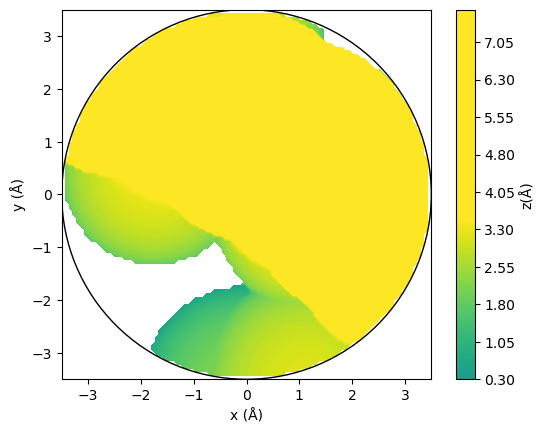

In [26]:
bv.plot_steric_map(filename='pd-c-o-1')
